In [26]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [34]:
# df = pd.read_csv("sim_data_summary_220715.csv")
df = pd.read_csv("sim_data_summary_220722.csv")
df["cost_per_frac_averted"] = df["cost"]/df["frac_averted_clinical__all"]
df

,archetype,baseline_eir,scenario_number,iptsc_rdts_used,iptsc_drugs_used,cases_treated,severe_cases_treated,received_smc,received_ivermectin,received_primaquine,...,itn_coverage,hs_rate,within_school_coverage,out_of_school_rate,target_age_range,smc_on,ivermectin,primaquine,smc_age_range,cost_per_frac_averted
0,Central,1,0,0.0,6020.0,4388.8,0.0,0.0,0.0,0.0,...,default,0.8,0.9,0.00,default,False,False,False,default,5.557303e+05
1,Central,3,0,0.0,5934.2,4751.8,0.0,0.0,0.0,0.0,...,default,0.8,0.9,0.00,default,False,False,False,default,5.652894e+05
2,Central,10,0,0.0,6271.2,6570.2,0.0,0.0,0.0,0.0,...,default,0.8,0.9,0.00,default,False,False,False,default,8.221964e+05
3,Central,30,0,0.0,6115.6,7664.4,0.0,0.0,0.0,0.0,...,default,0.8,0.9,0.00,default,False,False,False,default,8.914504e+05
4,Central,100,0,0.0,6222.2,9609.0,0.0,0.0,0.0,0.0,...,default,0.8,0.9,0.00,default,False,False,False,default,1.178364e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,Southern,1,55,0.0,5753.0,682.8,0.0,0.0,0.0,0.0,...,default,0.8,1.0,0.15,default,False,False,False,default,5.693119e+04
876,Southern,3,55,0.0,5917.2,1910.8,0.0,0.0,0.0,0.0,...,default,0.8,1.0,0.15,default,False,False,False,default,1.076173e+05
877,Southern,10,55,0.0,5753.6,3109.0,0.0,0.0,0.0,0.0,...,default,0.8,1.0,0.15,default,False,False,False,default,1.900523e+05
878,Southern,30,55,0.0,5874.8,4542.8,0.0,0.0,0.0,0.0,...,default,0.8,1.0,0.15,default,False,False,False,default,2.652100e+05


In [35]:
df.columns

Index(['archetype', 'baseline_eir', 'scenario_number', 'iptsc_rdts_used',
       'iptsc_drugs_used', 'cases_treated', 'severe_cases_treated',
       'received_smc', 'received_ivermectin', 'received_primaquine',
       ...
       'itn_coverage', 'hs_rate', 'within_school_coverage',
       'out_of_school_rate', 'target_age_range', 'smc_on', 'ivermectin',
       'primaquine', 'smc_age_range', 'cost_per_frac_averted'],
      dtype='object', length=126)

In [36]:
df = df[df["archetype"]=="Sahel"]

In [37]:
# enhanced SMC: 35: u10, 36: u15, 30: u5

(array([ 25.,   0.,   0.,   0.,   0.,   0.,  54., 232.,   4.,   5.]),
 array([    0.   ,  1162.865,  2325.73 ,  3488.595,  4651.46 ,  5814.325,
         6977.19 ,  8140.055,  9302.92 , 10465.785, 11628.65 ]),
 <BarContainer object of 10 artists>)

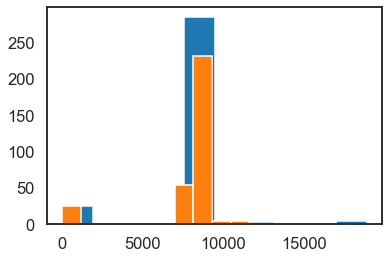

In [38]:
plt.hist(df["cost.smc"])
plt.hist(df["cost.smc.low"])

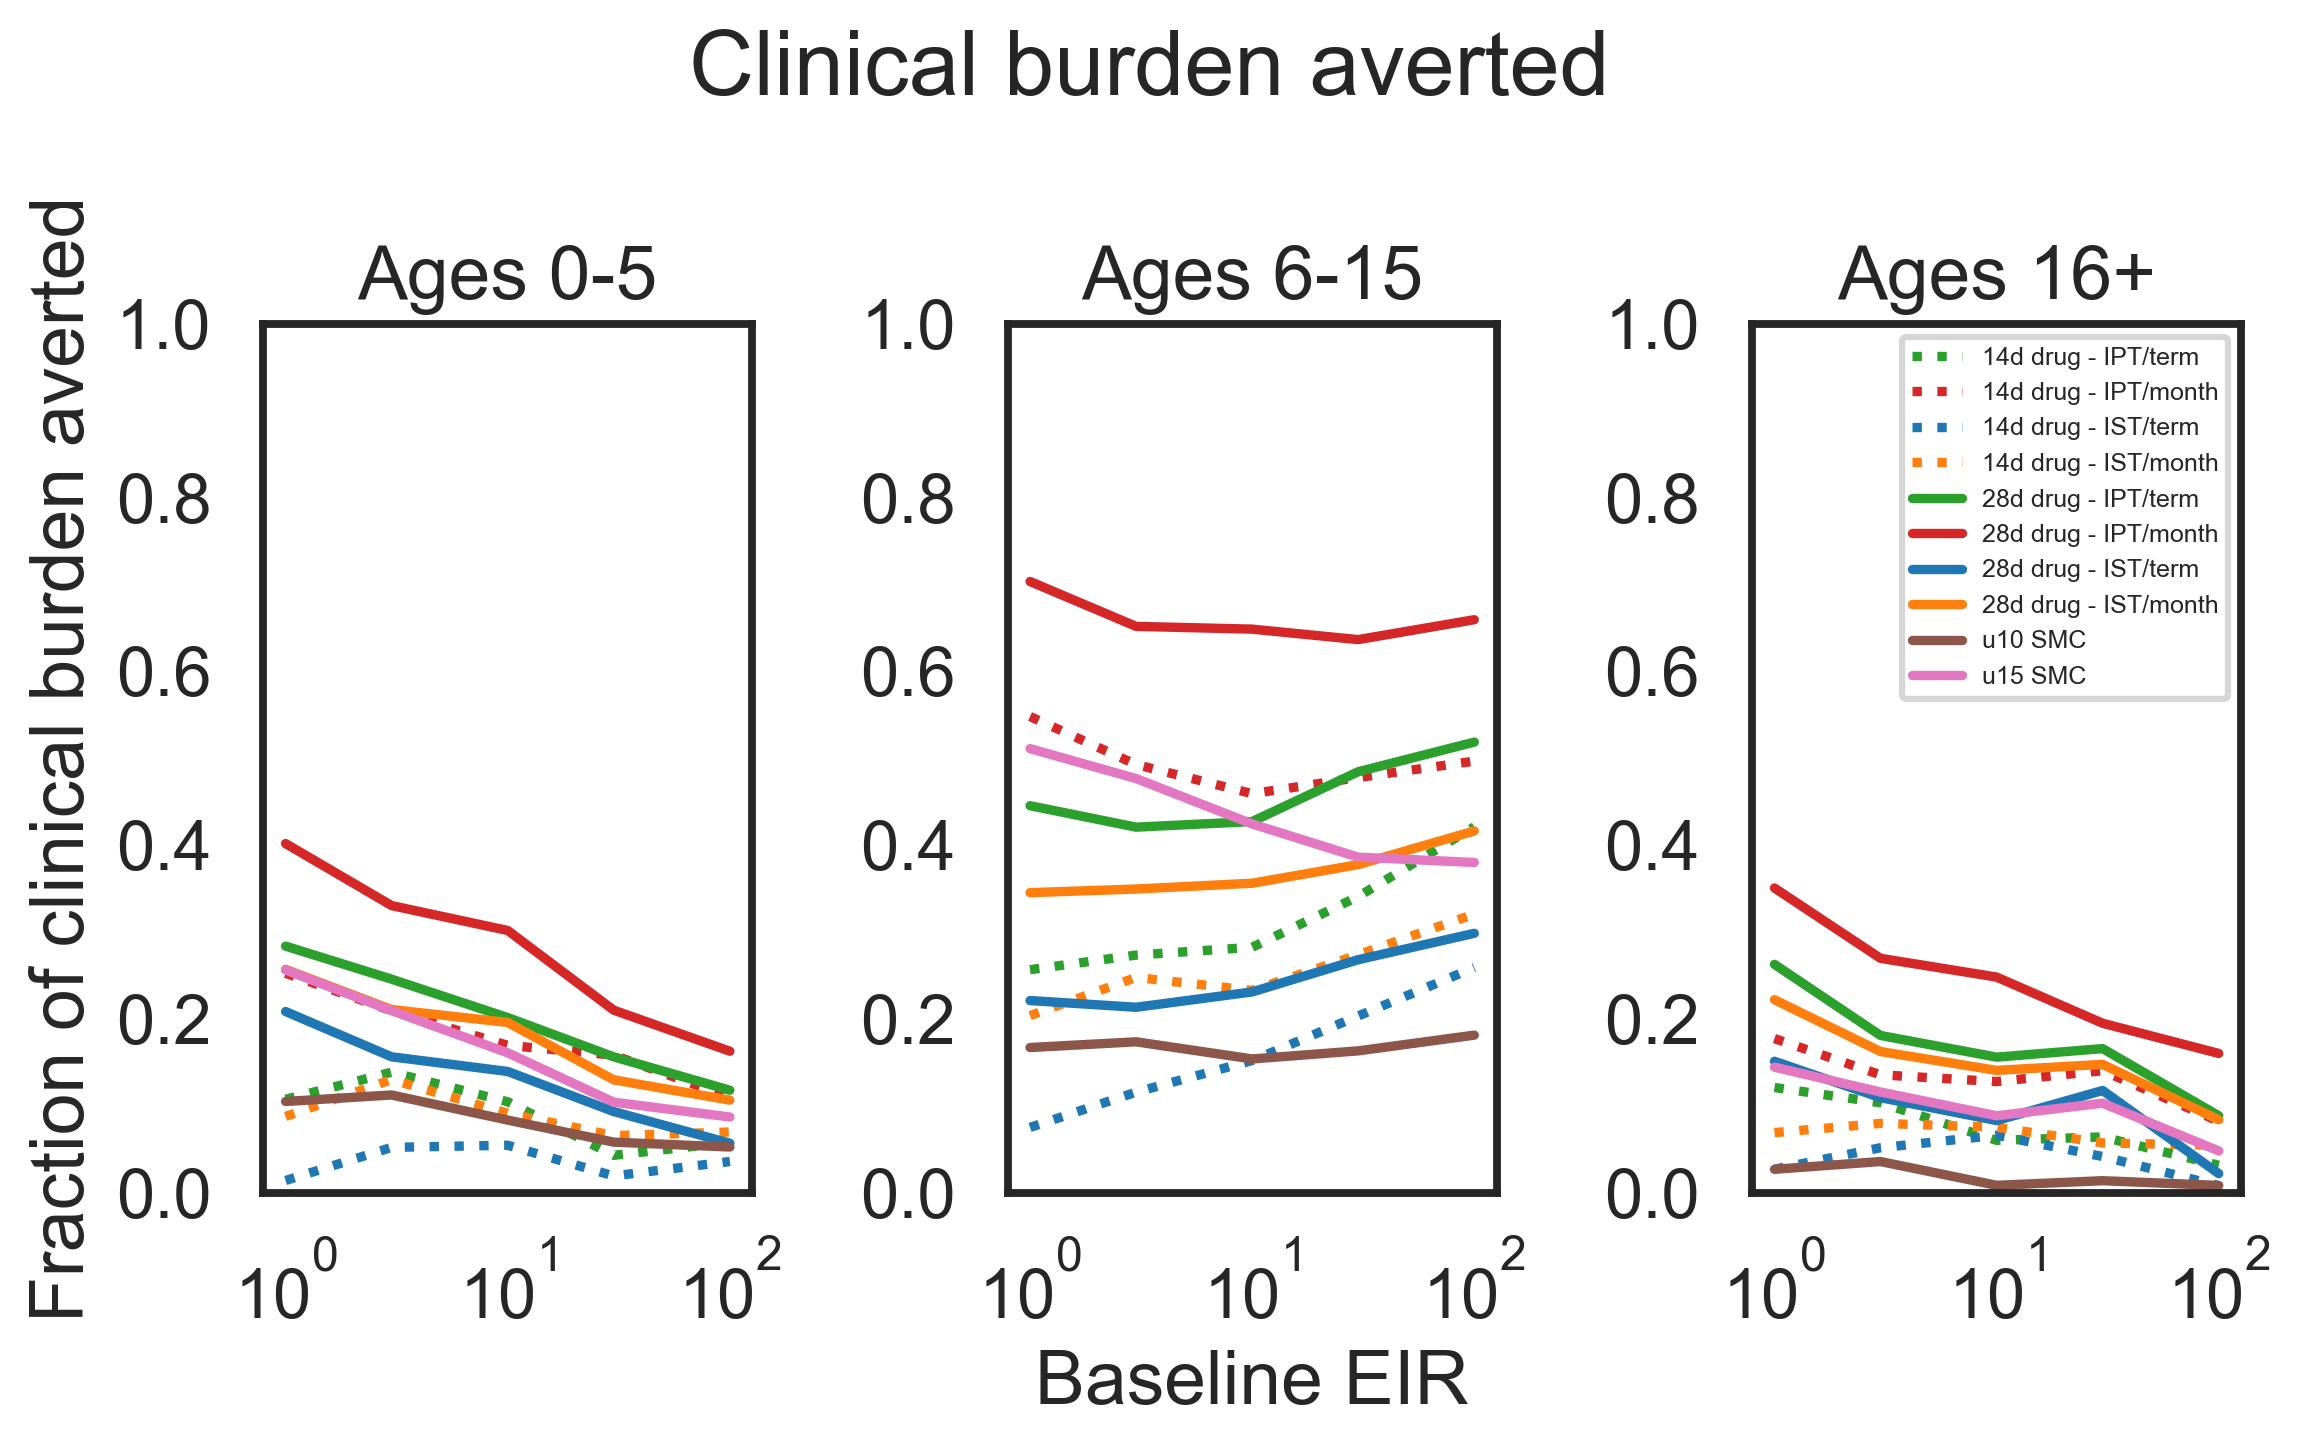

In [39]:
# label_dict = {
#     13: "Presumptive DP each term",
#     22: "Screen-and-treat DP each month",
#     16: "Presumptive DP each month",
# }

df_agg = df[df["archetype"]=="Sahel"]


    
label_dict = {
    1: "14d drug - IPT/term",
    4: "14d drug - IPT/month",
    7: "14d drug - IST/term",
    10: "14d drug - IST/month",
    13: "28d drug - IPT/term",
    16: "28d drug - IPT/month",
    19: "28d drug - IST/term",
    22: "28d drug - IST/month",
    35: "u10 SMC",
    36: "u15 SMC"
}

scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg[df_agg["scenario_number"]==s]

    
# color_dict = {}
# for i in range(len(label_dict)):
#     color_dict[scenario_list[i]] = "C{}".format(i)
color_dict = {
    1: "C2", #green
    13: "C2",
    4: "C3", #red
    16: "C3",
    7: "C0", #blue
    19: "C0",
    10: "C1", #orange
    22: "C1",
    35: "C5",
    36: "C6"
}

linestyle_dict = {
    1: "dotted",
    4: "dotted",
    7: "dotted",
    10: "dotted",
    13: "solid",
    16: "solid",
    19: "solid",
    22: "solid",
    35: "solid",
    36: "solid"
}

    
plt.figure(dpi=300, figsize=(8,5))

    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["baseline_eir"]
        y = s_dict[s]["frac_averted_clinical_{}".format(agebin)]
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle_dict[s], c=c)
        if i == 2:
            plt.legend(fontsize=6)
        if i == 1:
            plt.xlabel("Baseline EIR")
        if i == 0:
            plt.ylabel("Fraction of clinical burden averted")
        plt.ylim([0,1])
#         plt.xlabel("Baseline PfPR2-10")
        plt.title(agebin_label)
        plt.xscale("log")
plt.suptitle("Clinical burden averted")
plt.tight_layout()

In [40]:
scenarios_to_plot = [1,4,7,10,13,16,19,22]

df_sahel = df[df["archetype"]=="Sahel"]

df_ipt = df_sahel[np.in1d(df_sahel["scenario_number"], scenarios_to_plot)].reset_index(drop=True)
df_smc = df_sahel[np.in1d(df_sahel["scenario_number"], [35,36])].reset_index(drop=True)
df_ipt

,archetype,baseline_eir,scenario_number,iptsc_rdts_used,iptsc_drugs_used,cases_treated,severe_cases_treated,received_smc,received_ivermectin,received_primaquine,...,itn_coverage,hs_rate,within_school_coverage,out_of_school_rate,target_age_range,smc_on,ivermectin,primaquine,smc_age_range,cost_per_frac_averted
0,Sahel,1,1,0.0,5380.0,1986.4,0.0,6820.0,0.0,0.0,...,default,0.8,0.9,0.15,default,True,False,False,default,2.534452e+05
1,Sahel,3,1,0.0,5191.6,2581.2,0.0,6989.4,0.0,0.0,...,default,0.8,0.9,0.15,default,True,False,False,default,2.793208e+05
2,Sahel,10,1,0.0,5180.2,3308.8,0.0,6537.0,0.0,0.0,...,default,0.8,0.9,0.15,default,True,False,False,default,3.318459e+05
3,Sahel,30,1,0.0,5140.4,3992.0,0.0,6315.6,0.0,0.0,...,default,0.8,0.9,0.15,default,True,False,False,default,3.511661e+05
4,Sahel,100,1,0.0,5113.4,4705.4,0.0,6274.8,0.0,0.0,...,default,0.8,0.9,0.15,default,True,False,False,default,3.547426e+05
5,Sahel,1,4,0.0,10807.0,1601.0,0.0,6744.0,0.0,0.0,...,default,0.8,0.9,0.15,default,True,False,False,default,1.353560e+05
6,Sahel,3,4,0.0,10301.6,2139.8,0.0,7029.0,0.0,0.0,...,default,0.8,0.9,0.15,default,True,False,False,default,1.706098e+05
7,Sahel,10,4,0.0,10390.6,2892.4,0.0,6621.6,0.0,0.0,...,default,0.8,0.9,0.15,default,True,False,False,default,2.047769e+05
8,Sahel,30,4,0.0,10407.4,3600.8,0.0,6413.0,0.0,0.0,...,default,0.8,0.9,0.15,default,True,False,False,default,2.224119e+05
9,Sahel,100,4,0.0,10228.0,4450.4,0.0,6338.2,0.0,0.0,...,default,0.8,0.9,0.15,default,True,False,False,default,2.845421e+05


In [46]:
test["cost.smc.ref"]

0     8654.0600
1     8923.9200
2     8396.5600
3     8213.9925
4     7984.0450
5     8654.0600
6     8923.9200
7     8396.5600
8     8213.9925
9     7984.0450
10    8654.0600
11    8923.9200
12    8396.5600
13    8213.9925
14    7984.0450
Name: cost.smc.ref, dtype: float64

In [45]:
test = df_sahel[np.in1d(df_sahel["scenario_number"], [30,35,36])].reset_index(drop=True)
test[["baseline_eir","scenario_number","cost.smc", "cost.smc.low"]]

,baseline_eir,scenario_number,cost.smc,cost.smc.low
0,1,30,8654.0600,8654.0600
1,3,30,8923.9200,8923.9200
2,10,30,8396.5600,8396.5600
3,30,30,8213.9925,8213.9925
4,100,30,7984.0450,7984.0450
5,1,35,13462.6150,9961.2400
6,3,35,13626.3850,10202.2600
7,10,35,13043.6625,9659.8500
8,30,35,12847.9625,9473.7125
9,100,35,12716.6375,9270.5750


In [52]:
df_raw = pd.read_csv("sim_data_full_220708.csv")
df_raw = df_raw[np.logical_and(df_raw["archetype"]=="Sahel", np.in1d(df_raw["scenario_number"], [30,35,36]))]
df_raw.groupby(["baseline_eir","scenario_number"]).agg("mean").reset_index()[["baseline_eir", "scenario_number","received_smc"]]

,baseline_eir,scenario_number,received_smc
0,1,30,6721.6
1,1,35,10456.4
2,1,36,14695.6
3,3,30,6931.2
4,3,35,10583.6
5,3,36,14659.0
6,10,30,6521.6
7,10,35,10131.0
8,10,36,14285.8
9,30,30,6379.8


In [53]:
6721.6/8

840.2

In [54]:
10456.4/8

1307.05

In [55]:
14695.6/8

1836.95

In [57]:
17733.7675/1836.95/2

4.826959770271374

In [58]:
10634.4550/1836.95/2

2.8945956612863712

In [59]:
12716.6375/1307.05/2

4.864633143338052

In [60]:
9270.5750/1307.05/2

3.5463735128724996

In [47]:
11000/9000

1.2222222222222223

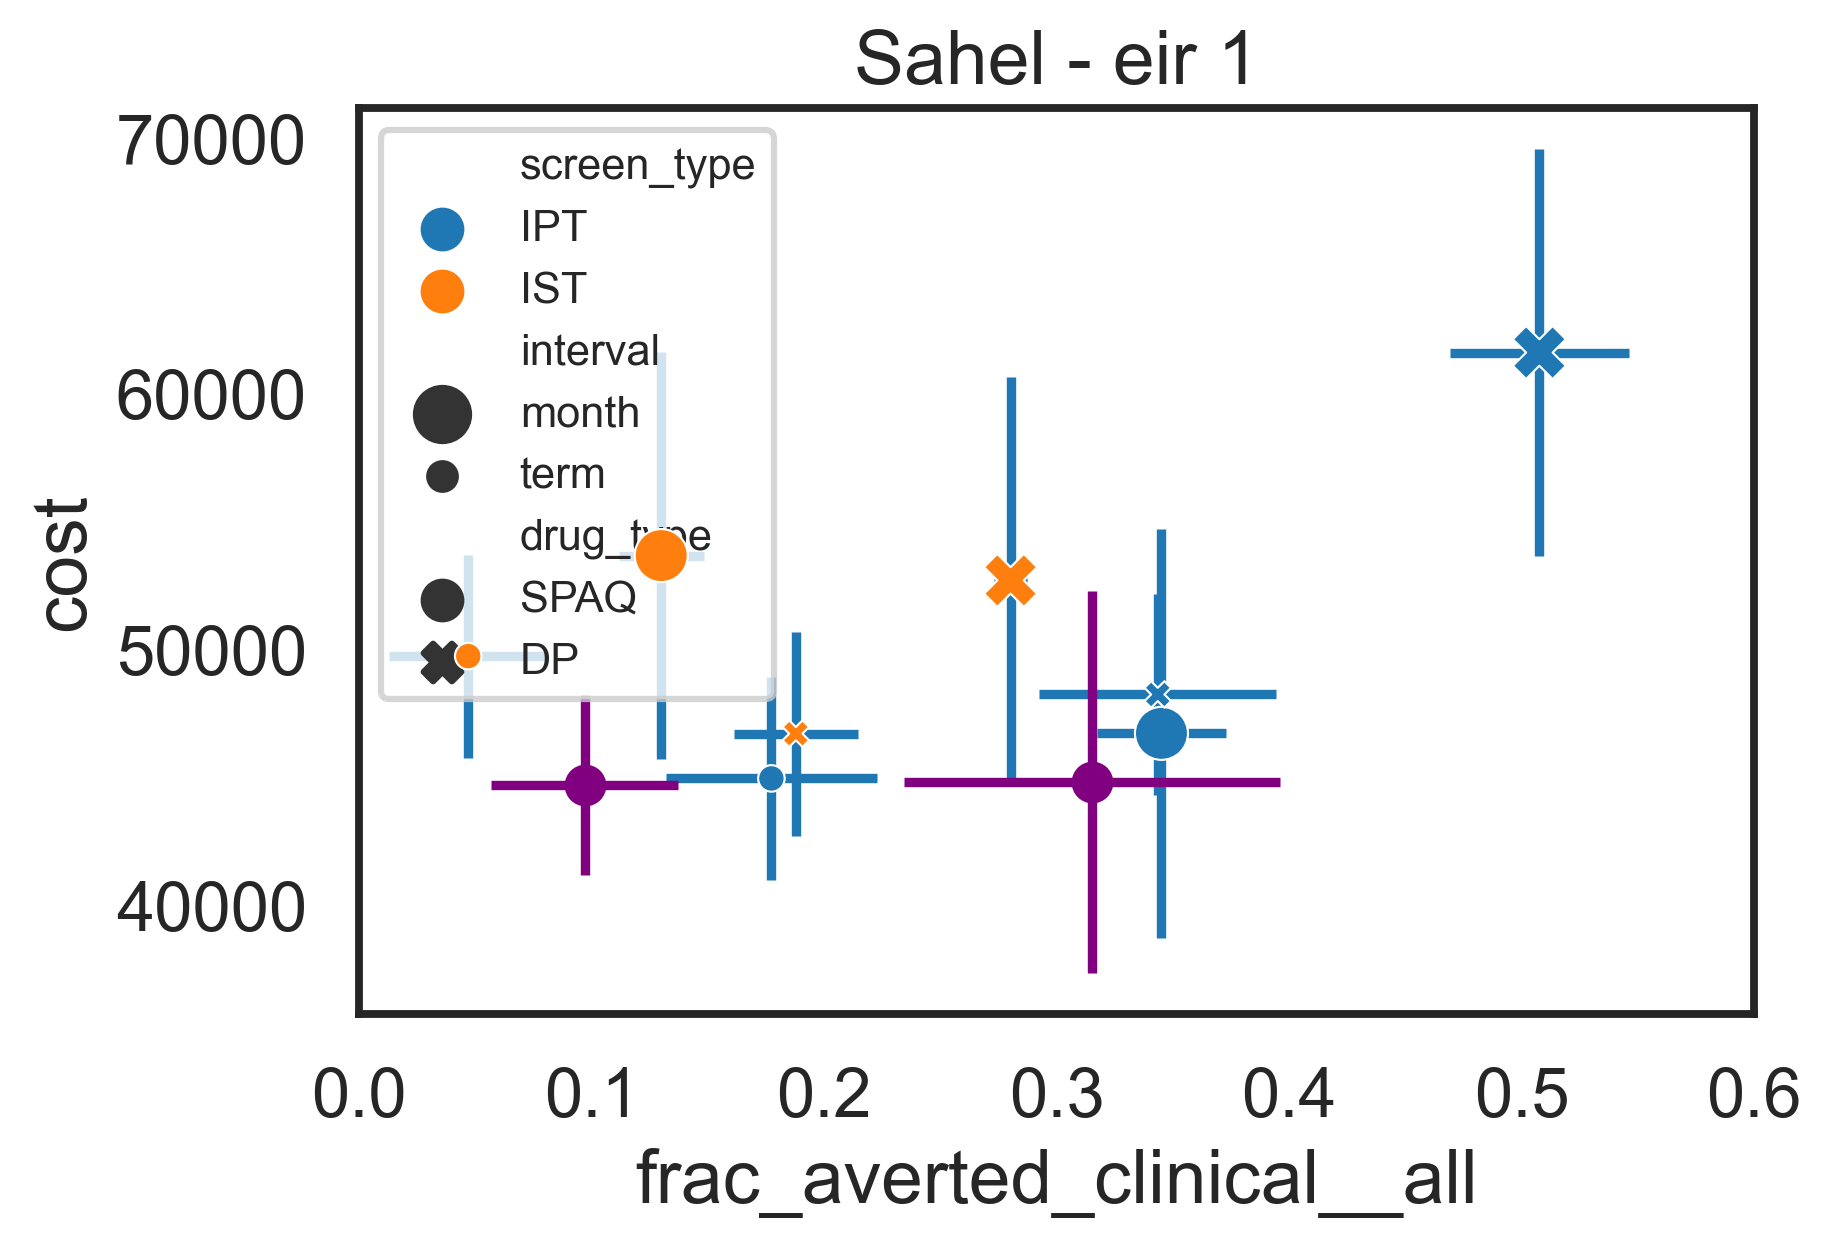

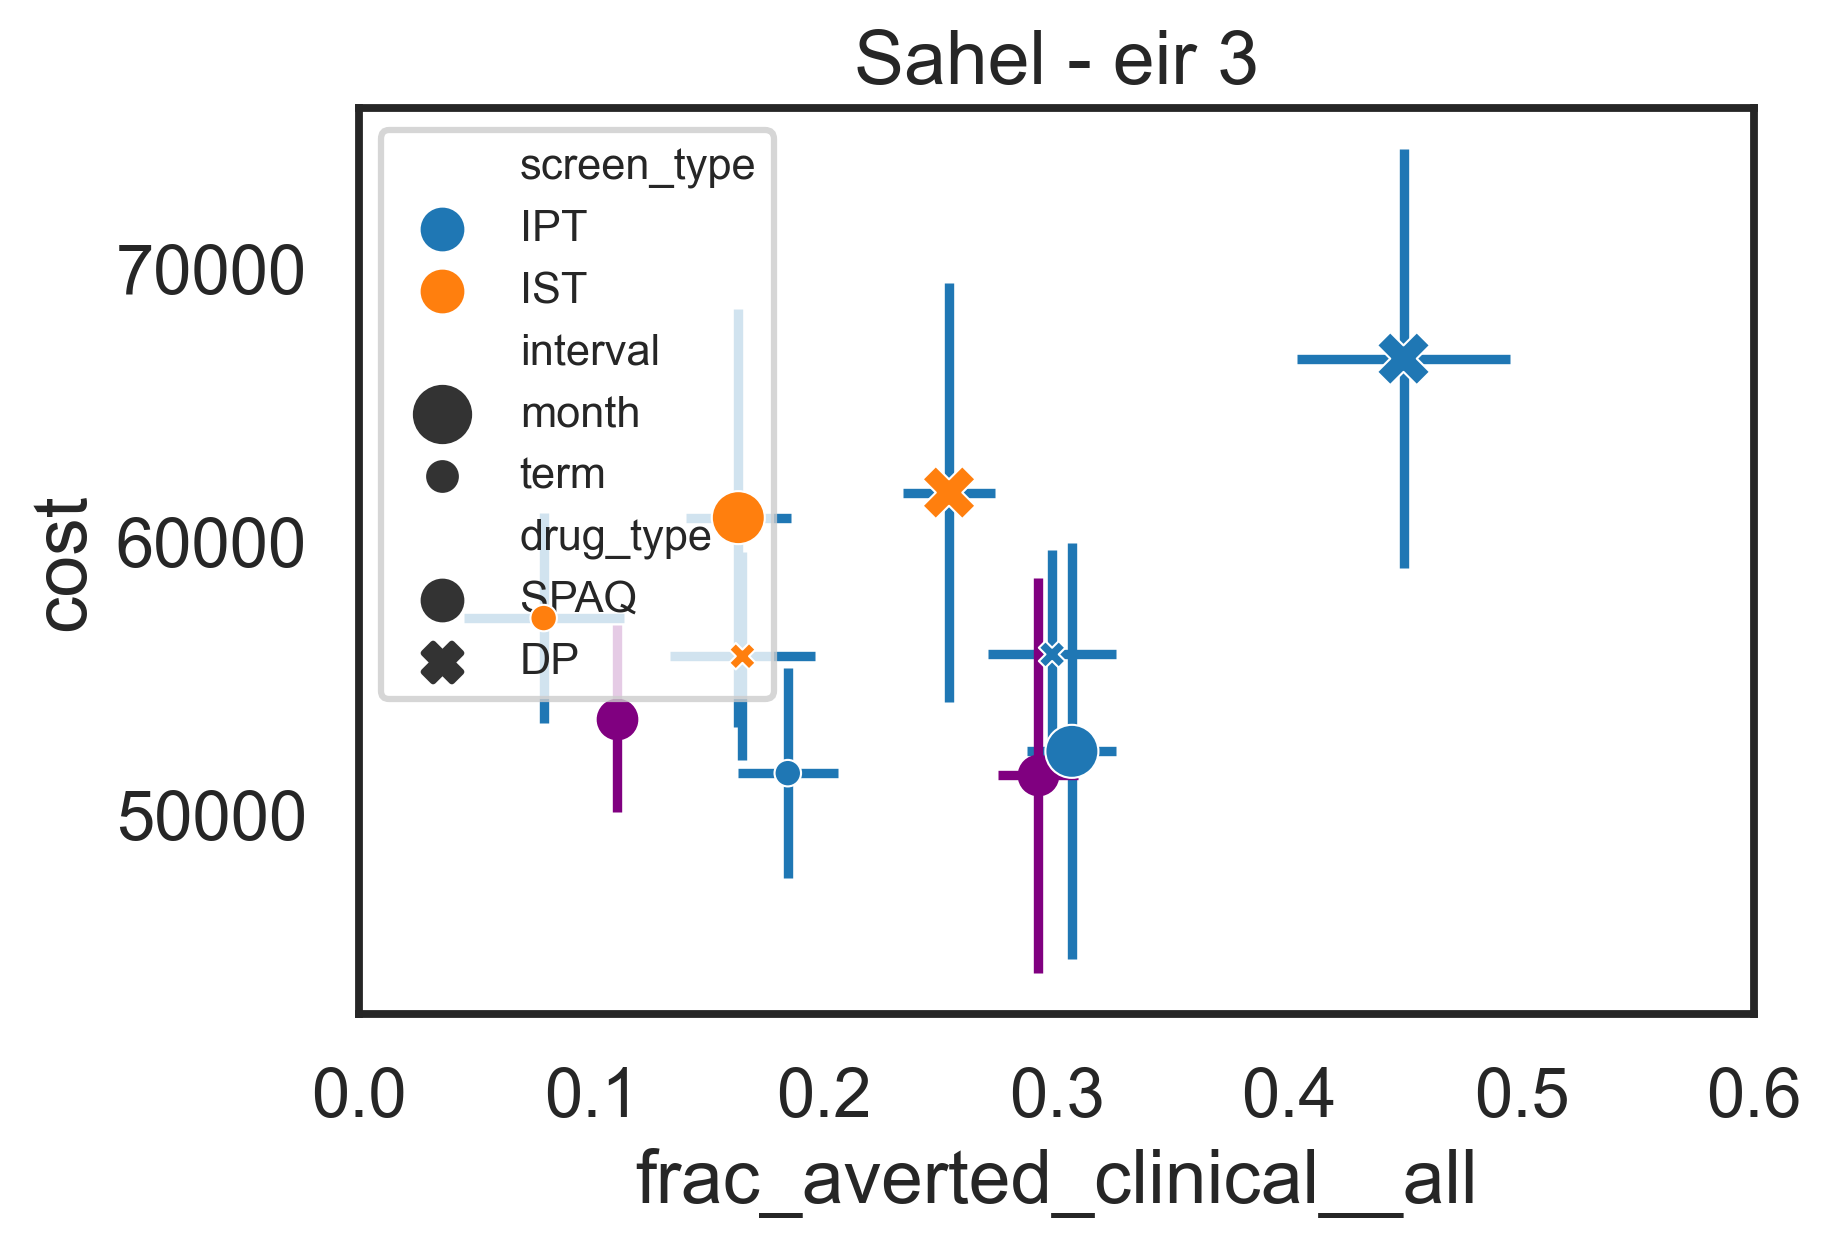

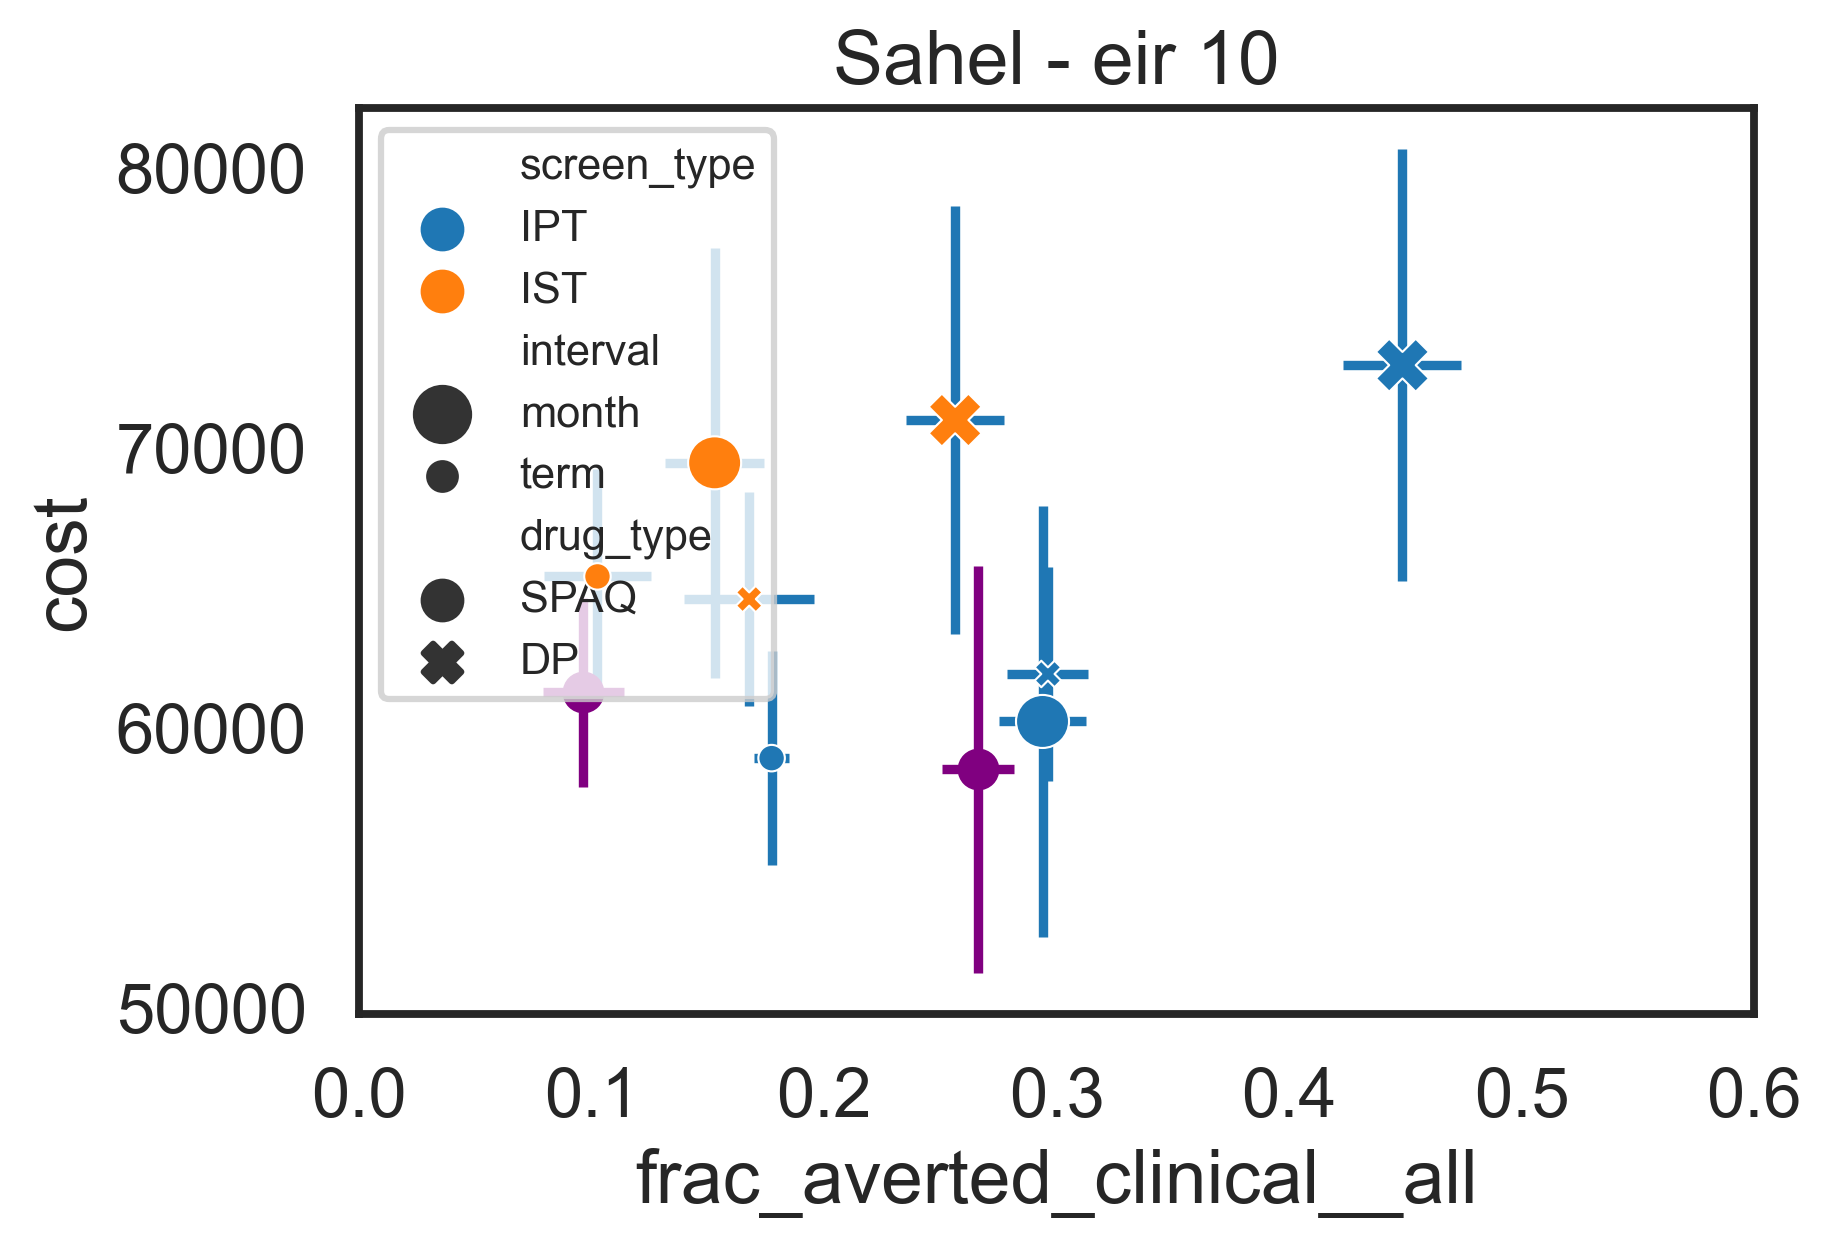

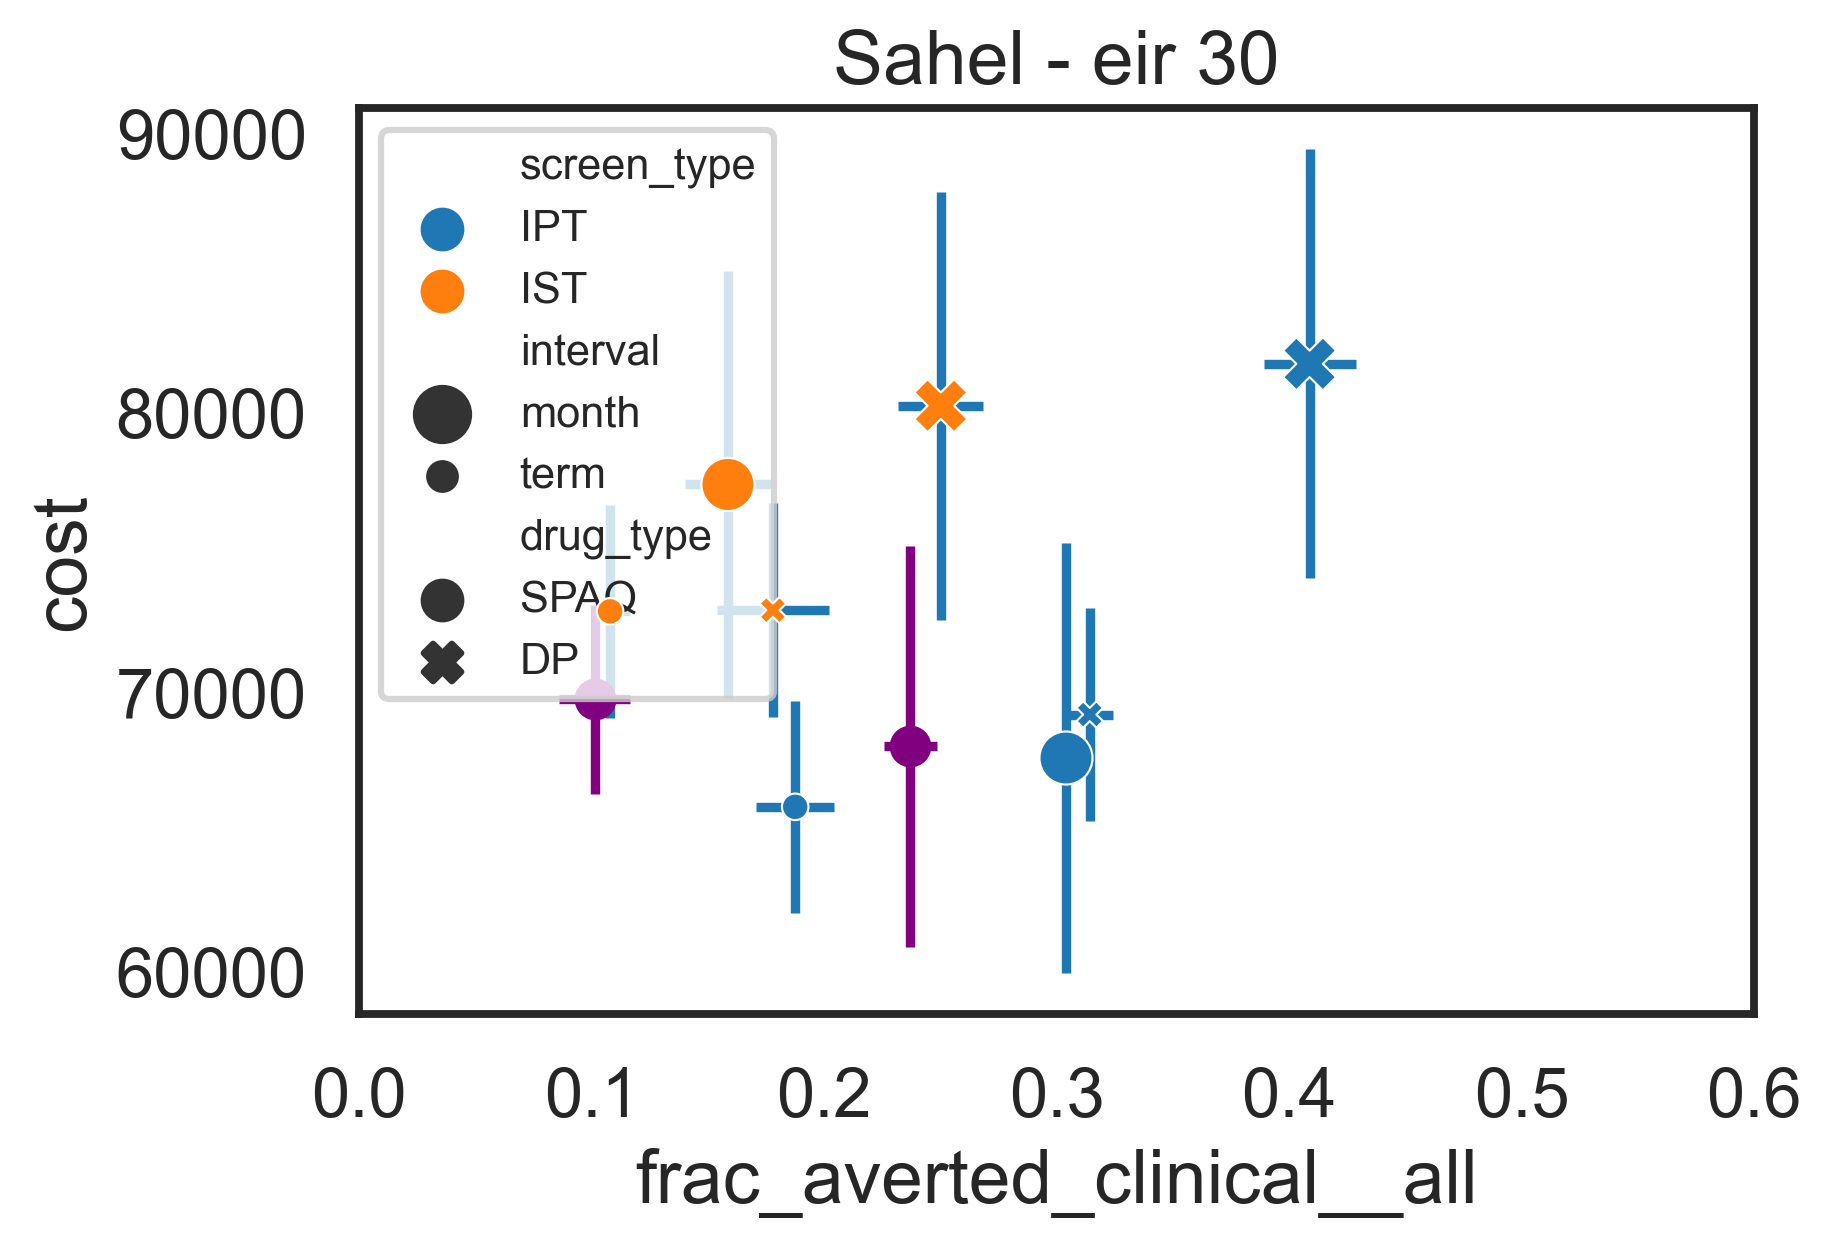

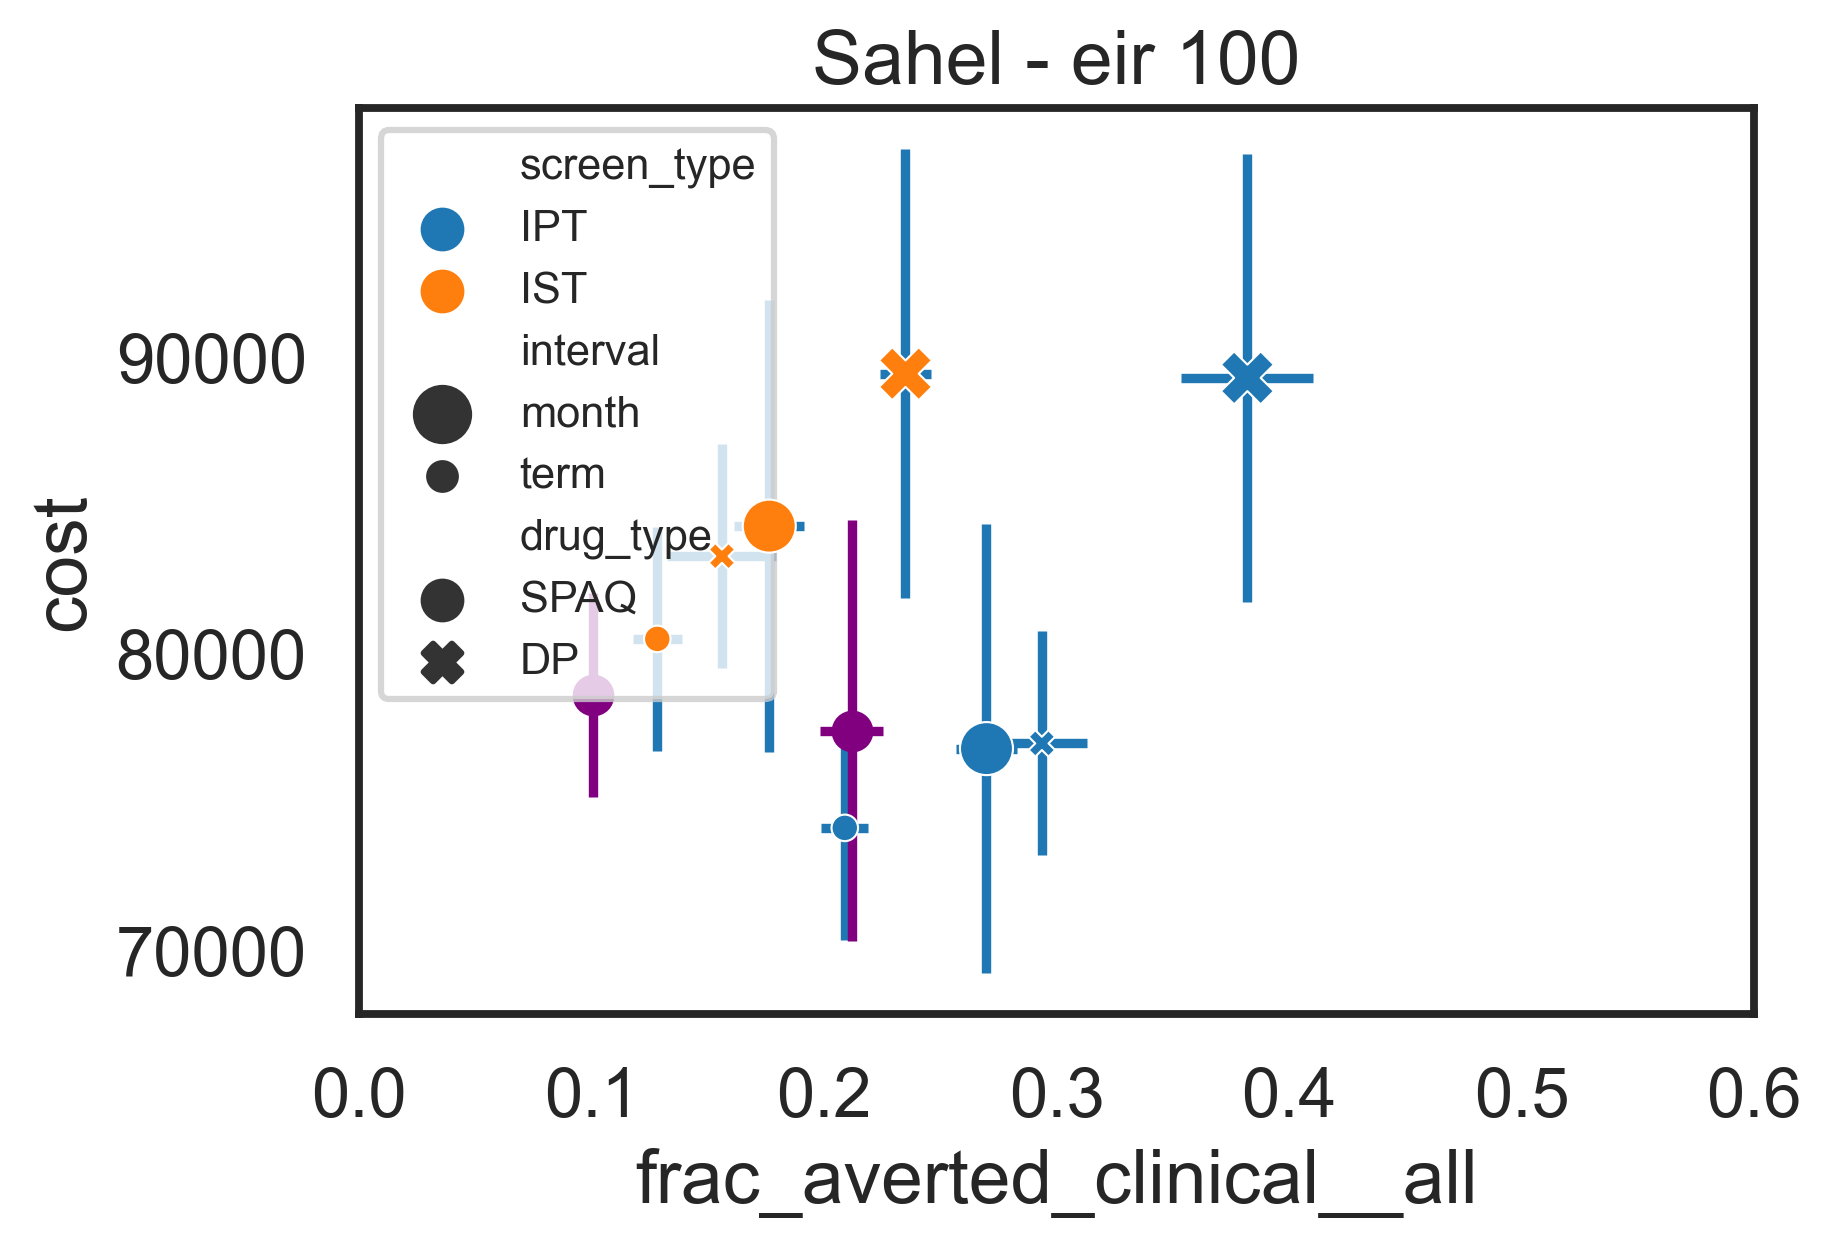

In [42]:
for a, sdf in df_ipt.groupby(["archetype", "baseline_eir"]):
    plt.figure(dpi=300)
    sns.scatterplot(data=sdf, x="frac_averted_clinical__all", y="cost", style="drug_type", hue="screen_type", size="interval", size_order=["month","term"], zorder=10)
    plt.errorbar(sdf["frac_averted_clinical__all"], sdf["cost"], xerr=sdf["frac_averted_clinical__all_STDEV"], yerr=(sdf["cost"]-sdf["cost.no_overhead"]), ls='none')
    plt.title(f"{a[0]} - eir {a[1]}") 
    plt.legend(fontsize="xx-small", loc=2)
    
    # add smc points:
    sdf_smc = df_smc[df_smc["baseline_eir"]==a[1]]
    plt.errorbar(sdf_smc["frac_averted_clinical__all"], sdf_smc["cost"], xerr=sdf_smc["frac_averted_clinical__all_STDEV"], yerr=(sdf_smc["cost"]-sdf_smc["cost.low"]), marker='o',ls='none',color='purple')
    plt.xlim([0,0.6])

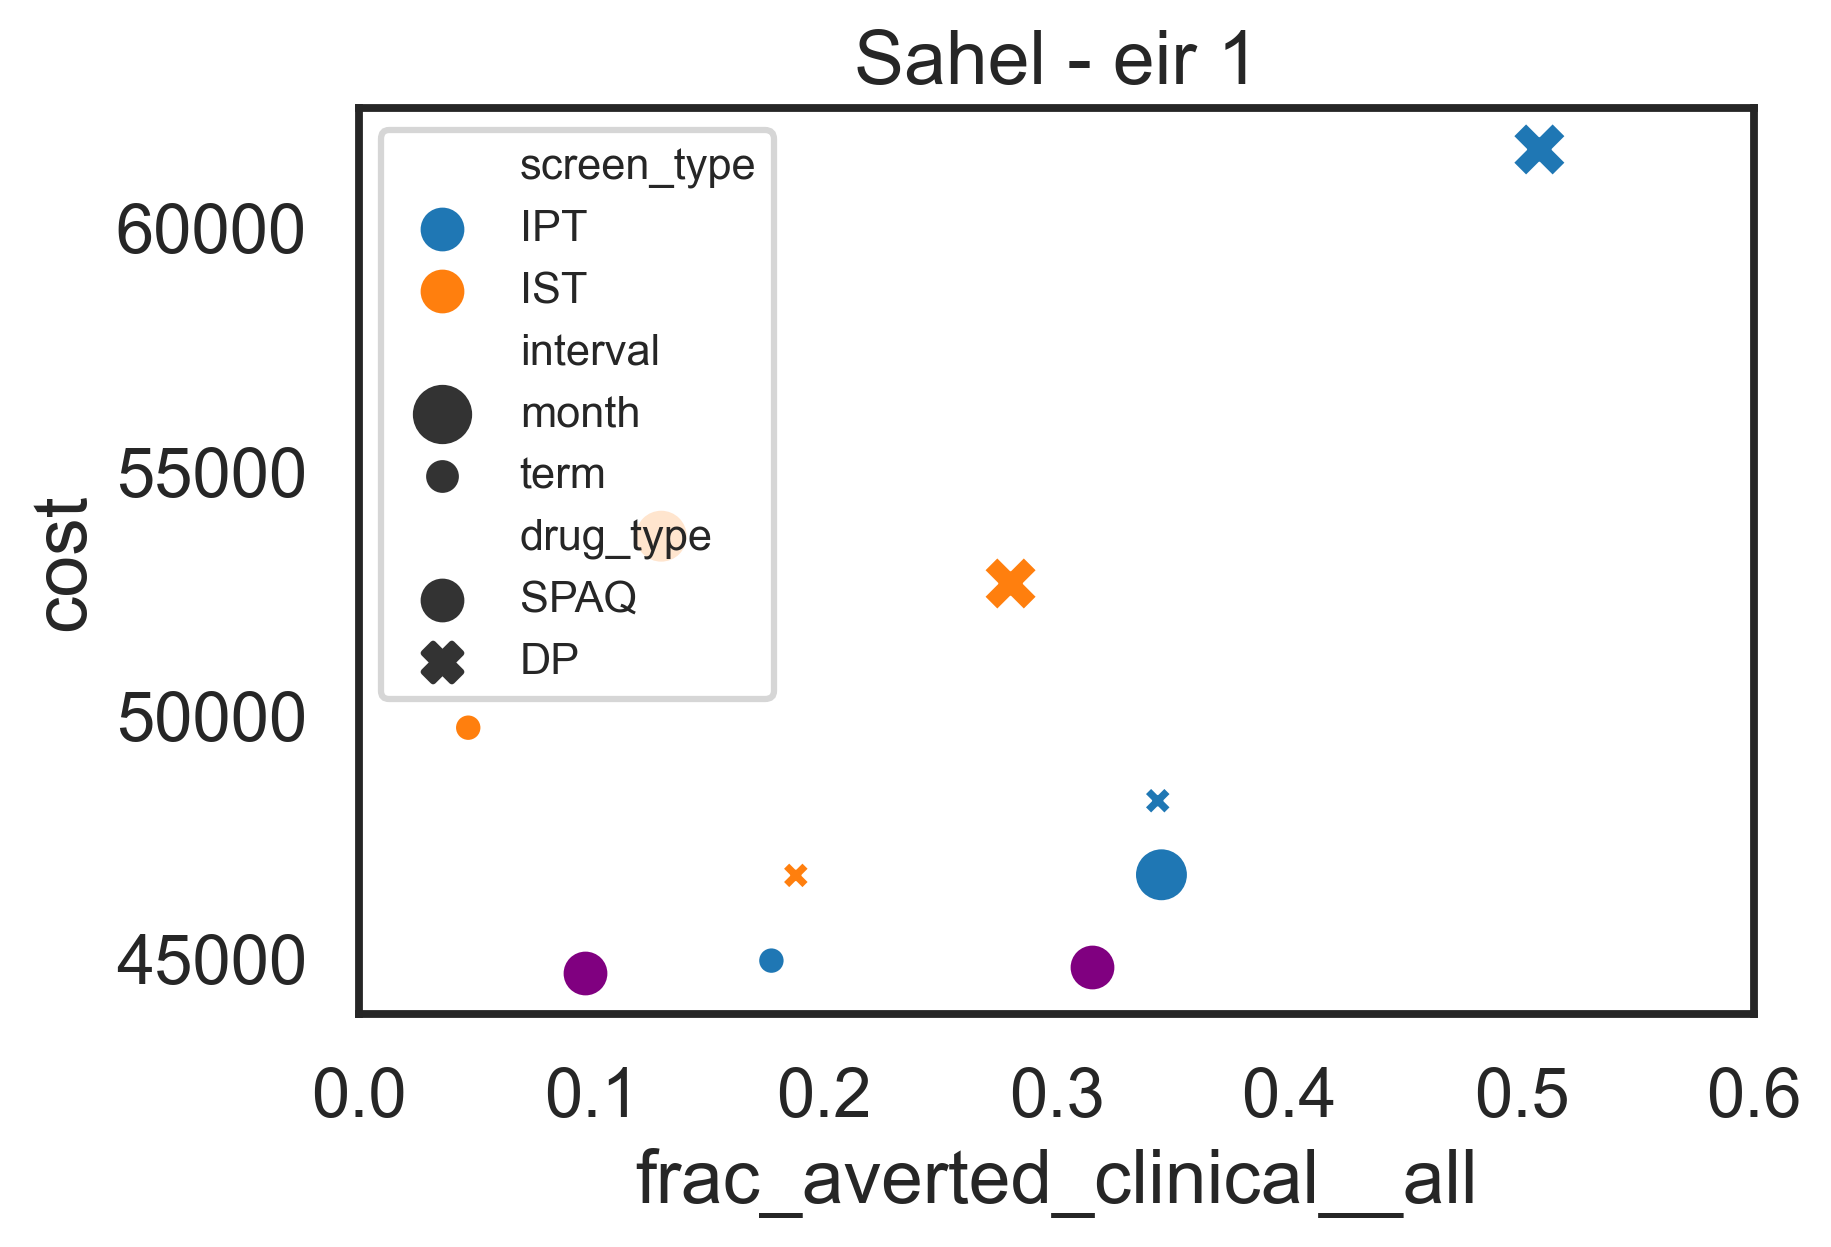

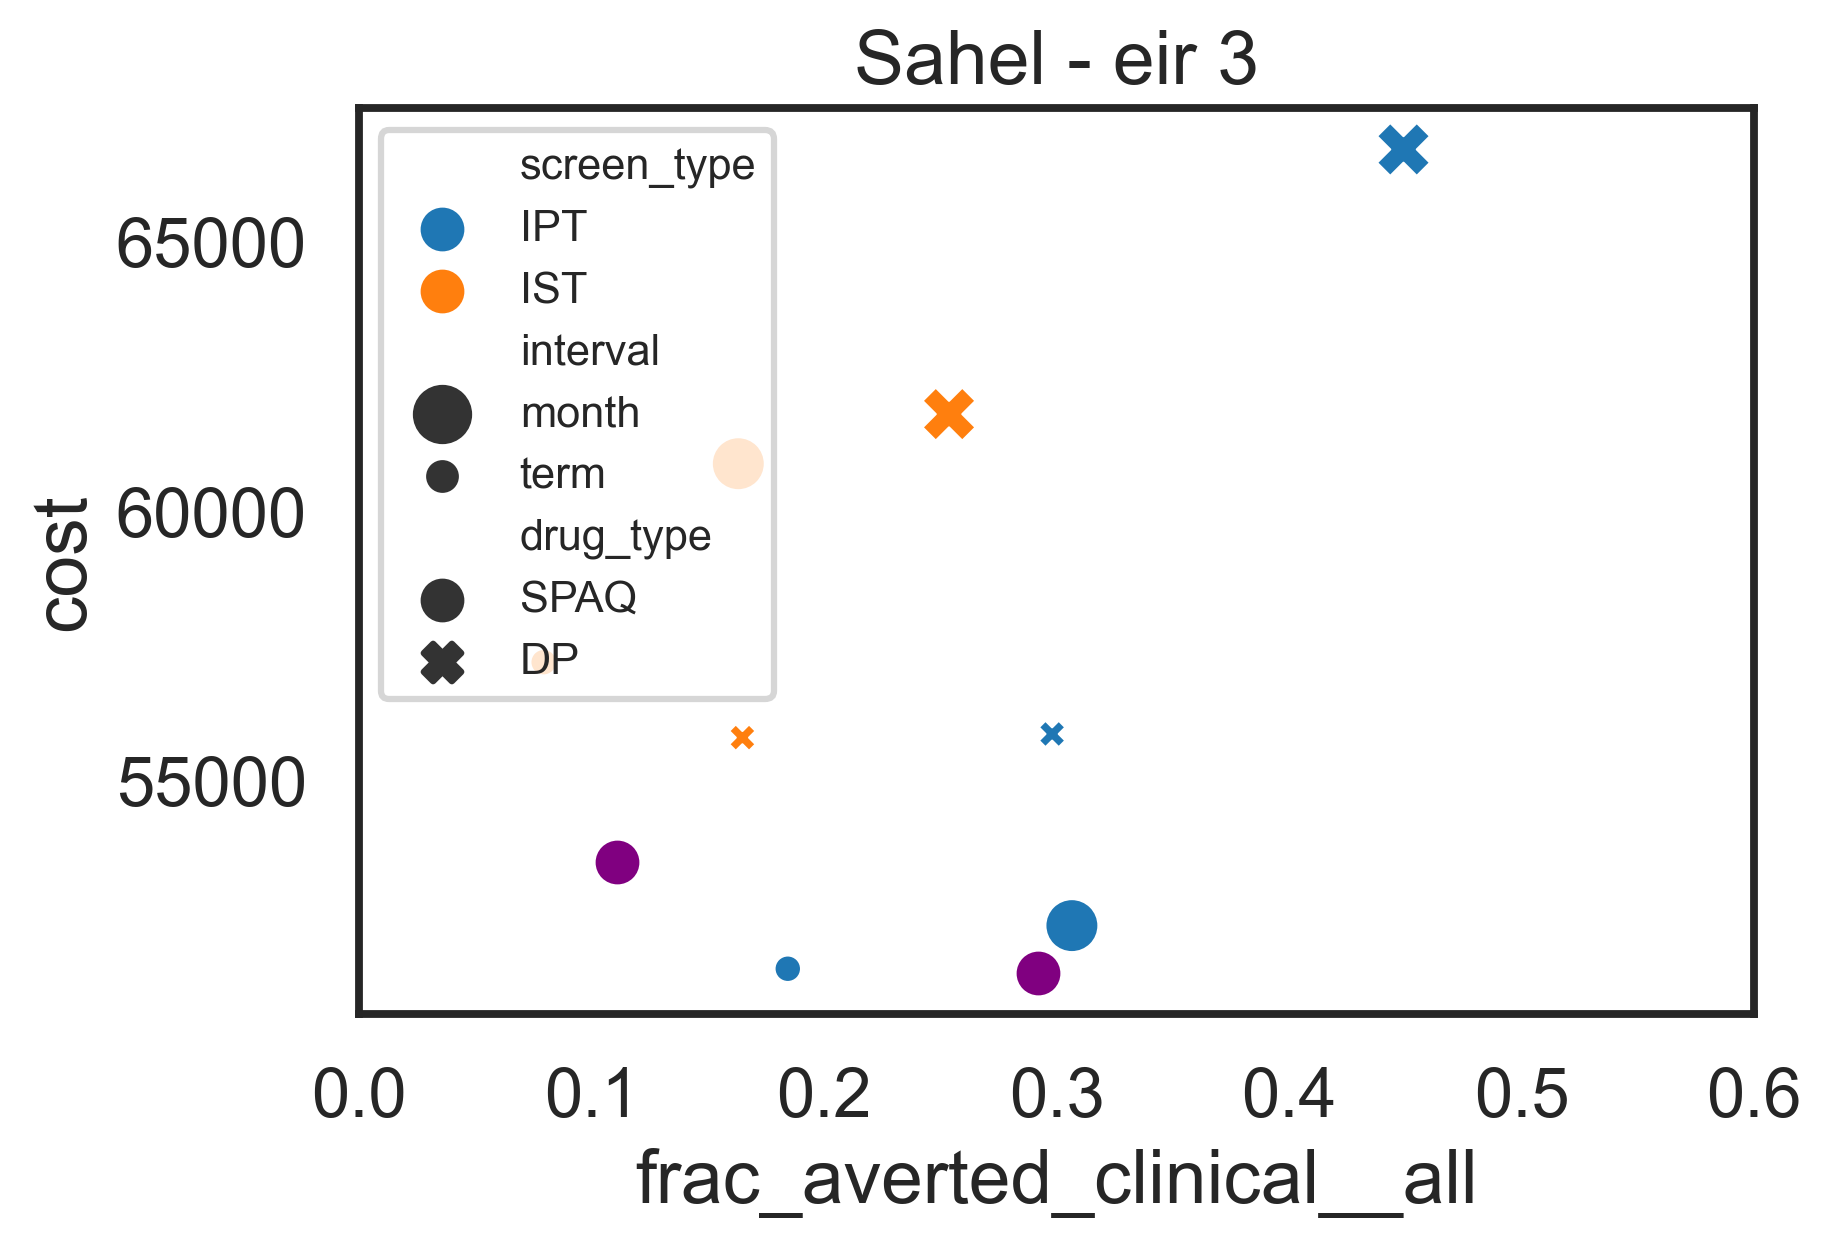

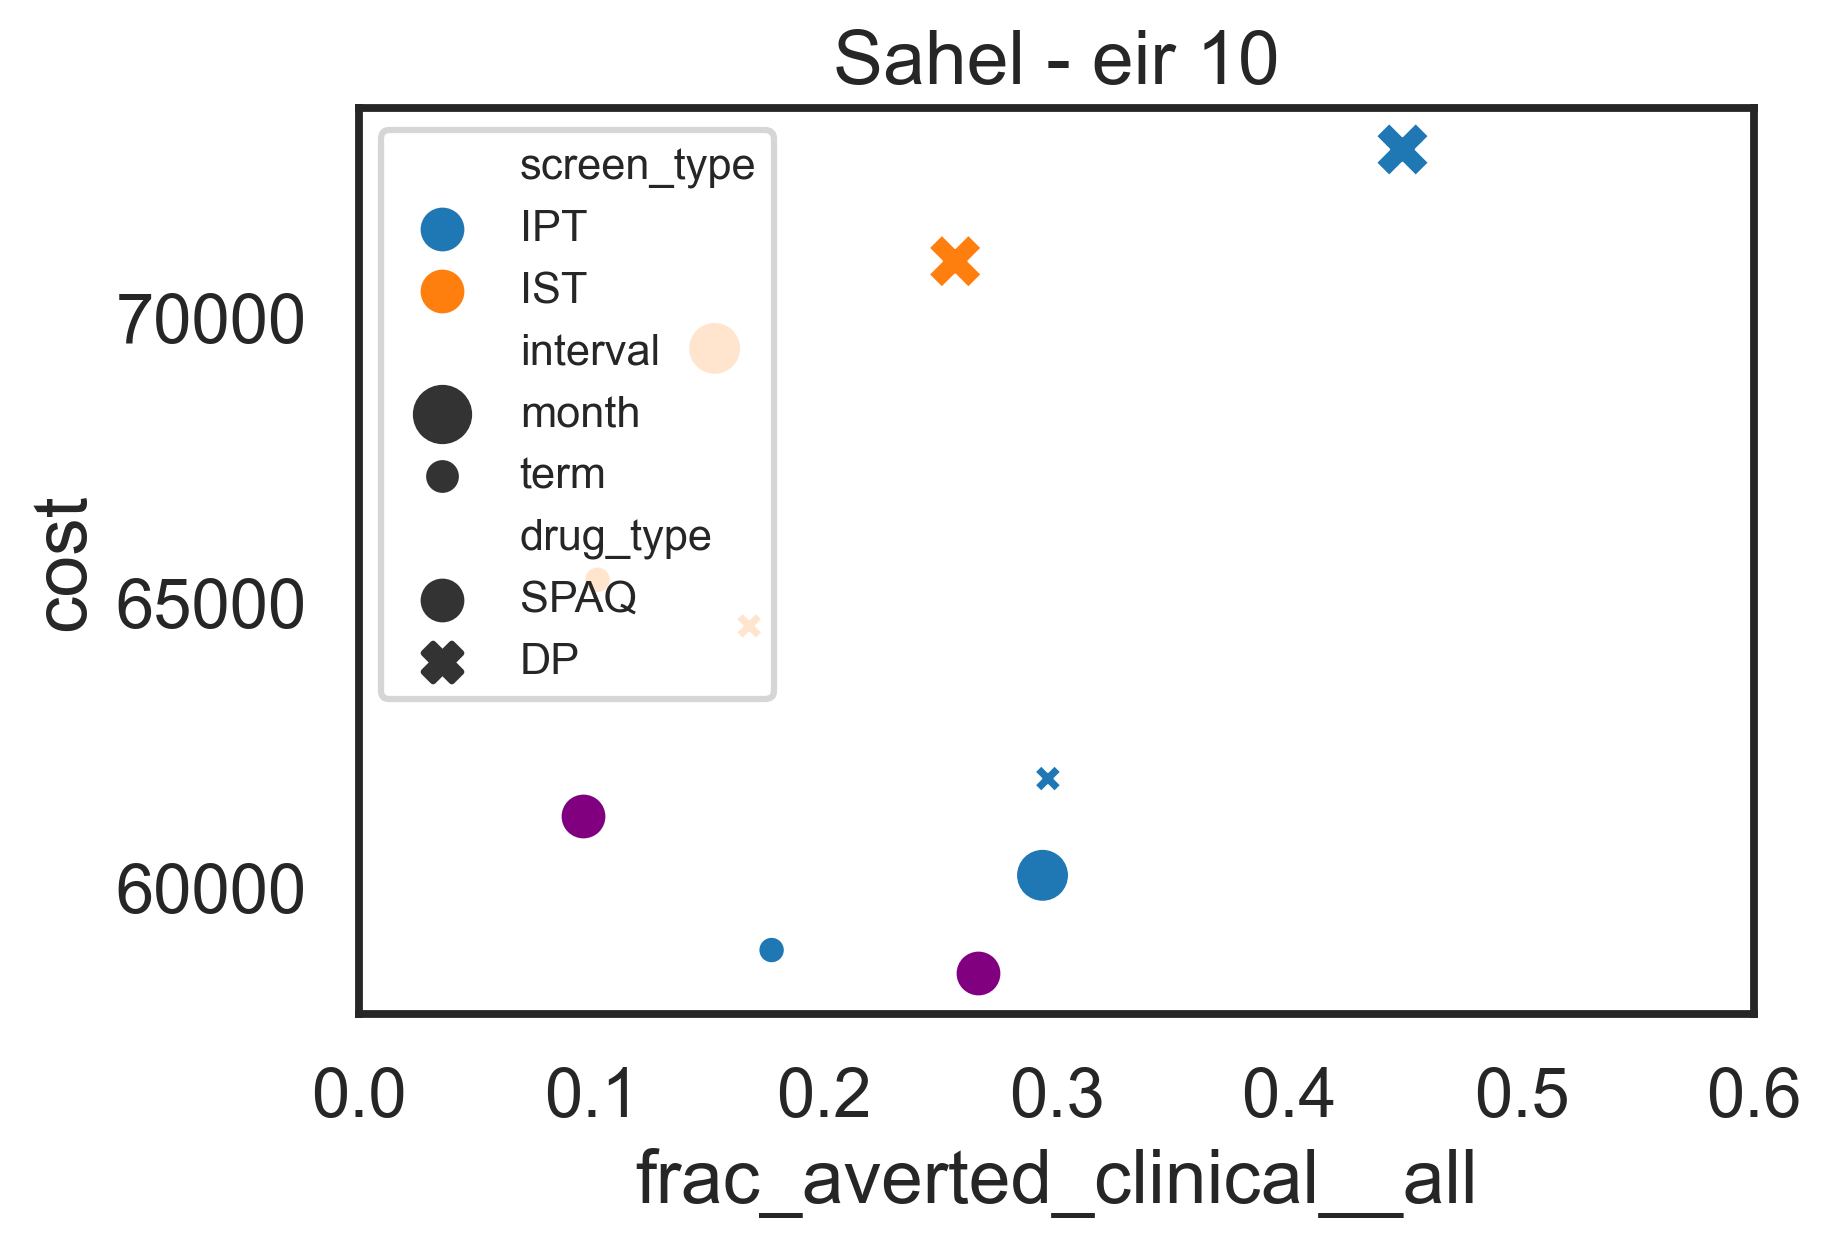

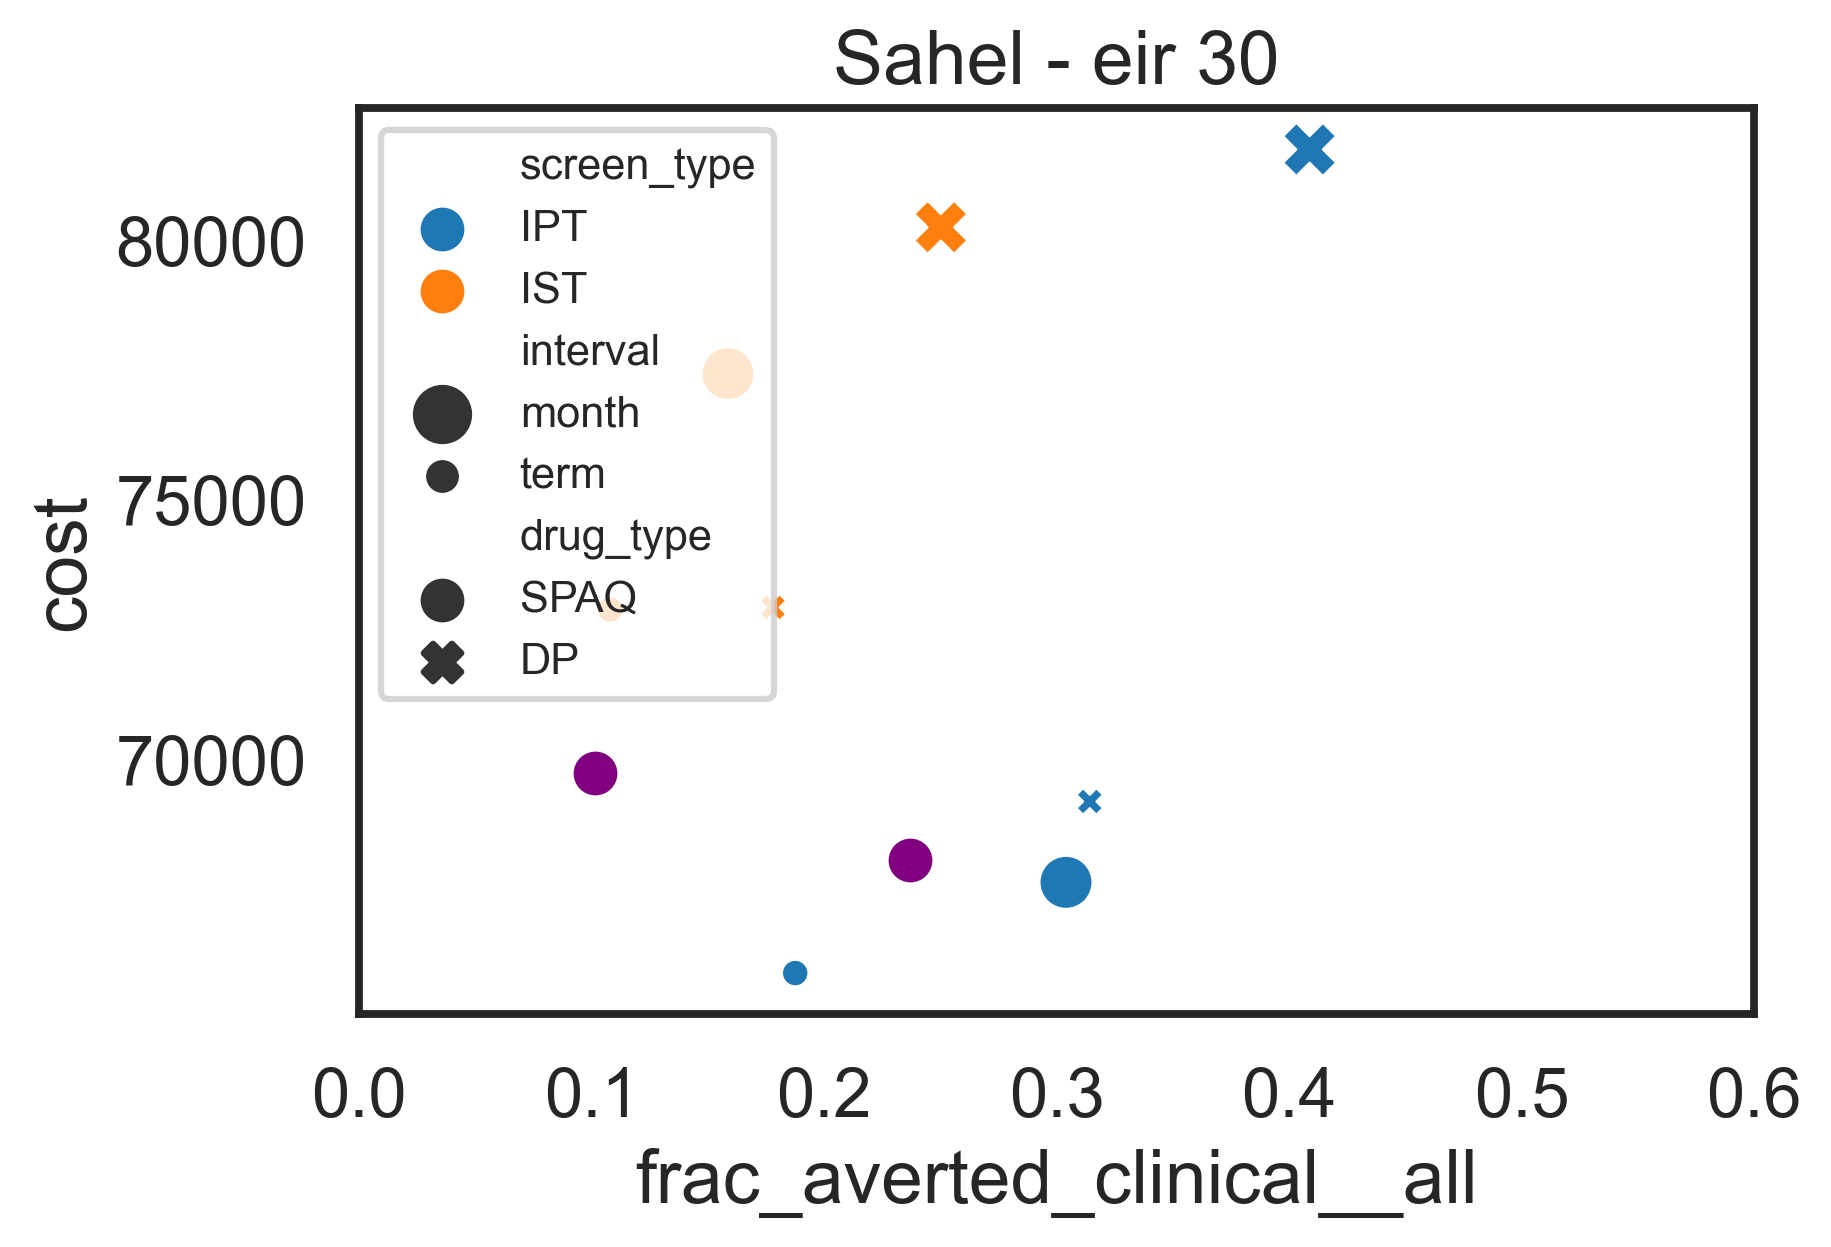

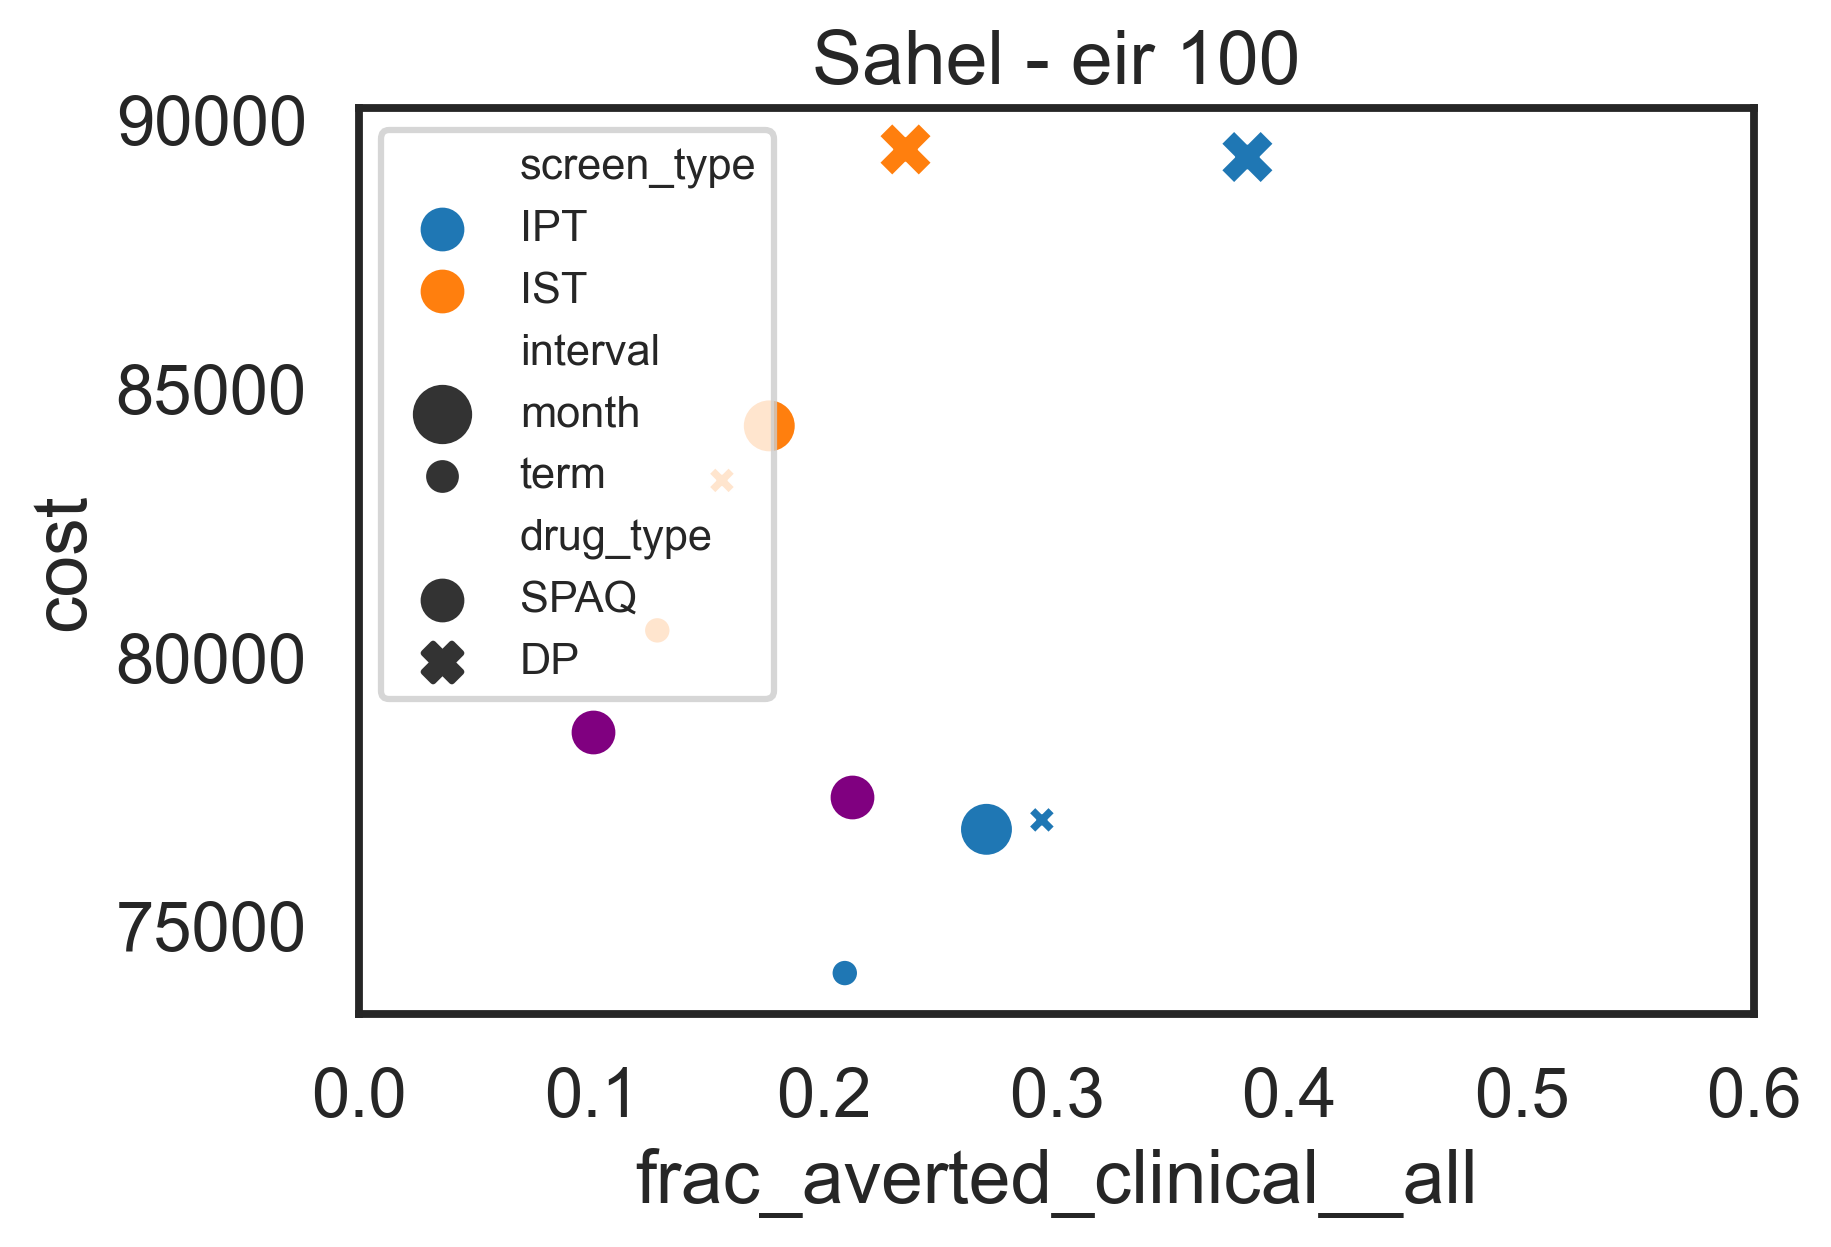

In [10]:
for a, sdf in df_ipt.groupby(["archetype", "baseline_eir"]):
    plt.figure(dpi=300)
    sns.scatterplot(data=sdf, x="frac_averted_clinical__all", y="cost", style="drug_type", hue="screen_type", size="interval", size_order=["month","term"])
    plt.title(f"{a[0]} - eir {a[1]}") 
    plt.legend(fontsize="xx-small", loc=2)
    
    # add smc points:
    sdf_smc = df_smc[df_smc["baseline_eir"]==a[1]]
    plt.scatter(sdf_smc["frac_averted_clinical__all"], sdf_smc["cost"], color='purple')
    plt.xlim([0,0.6])

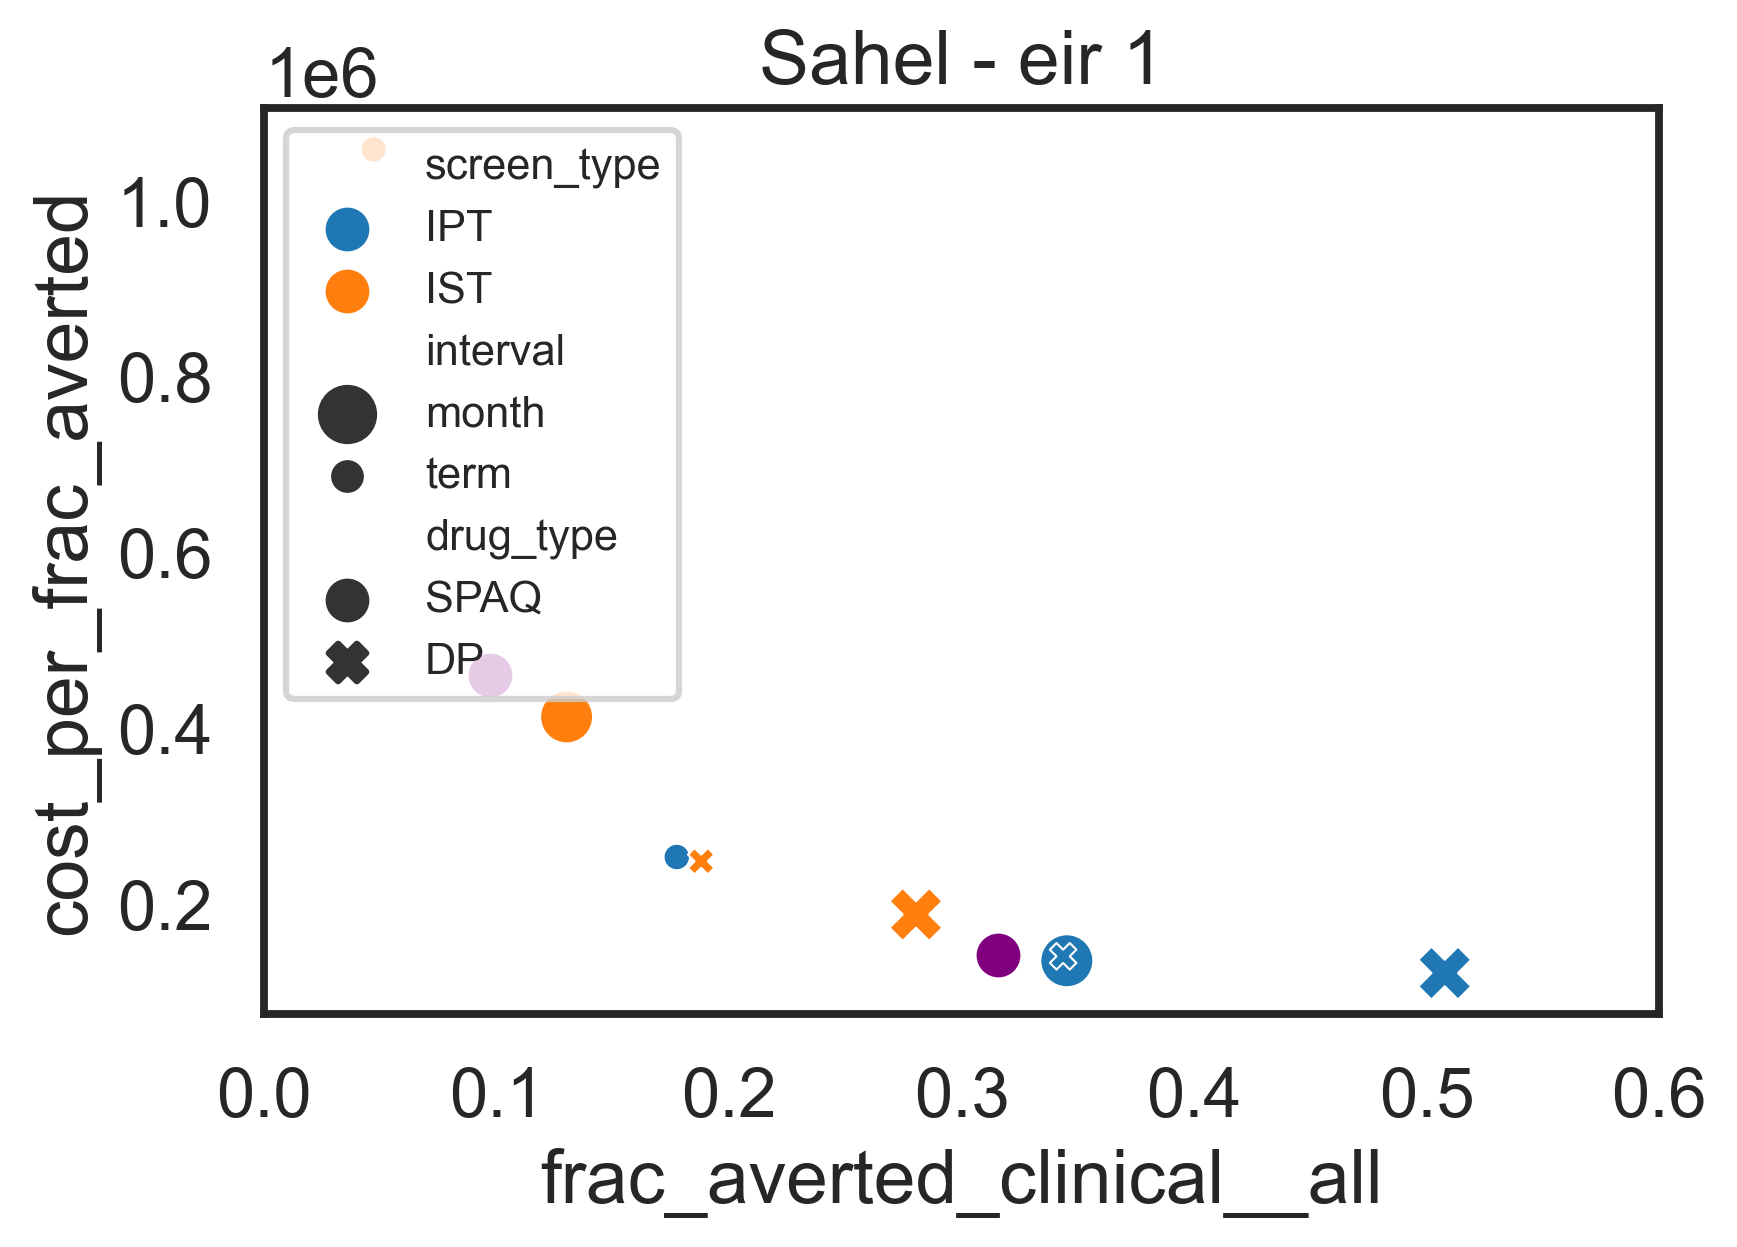

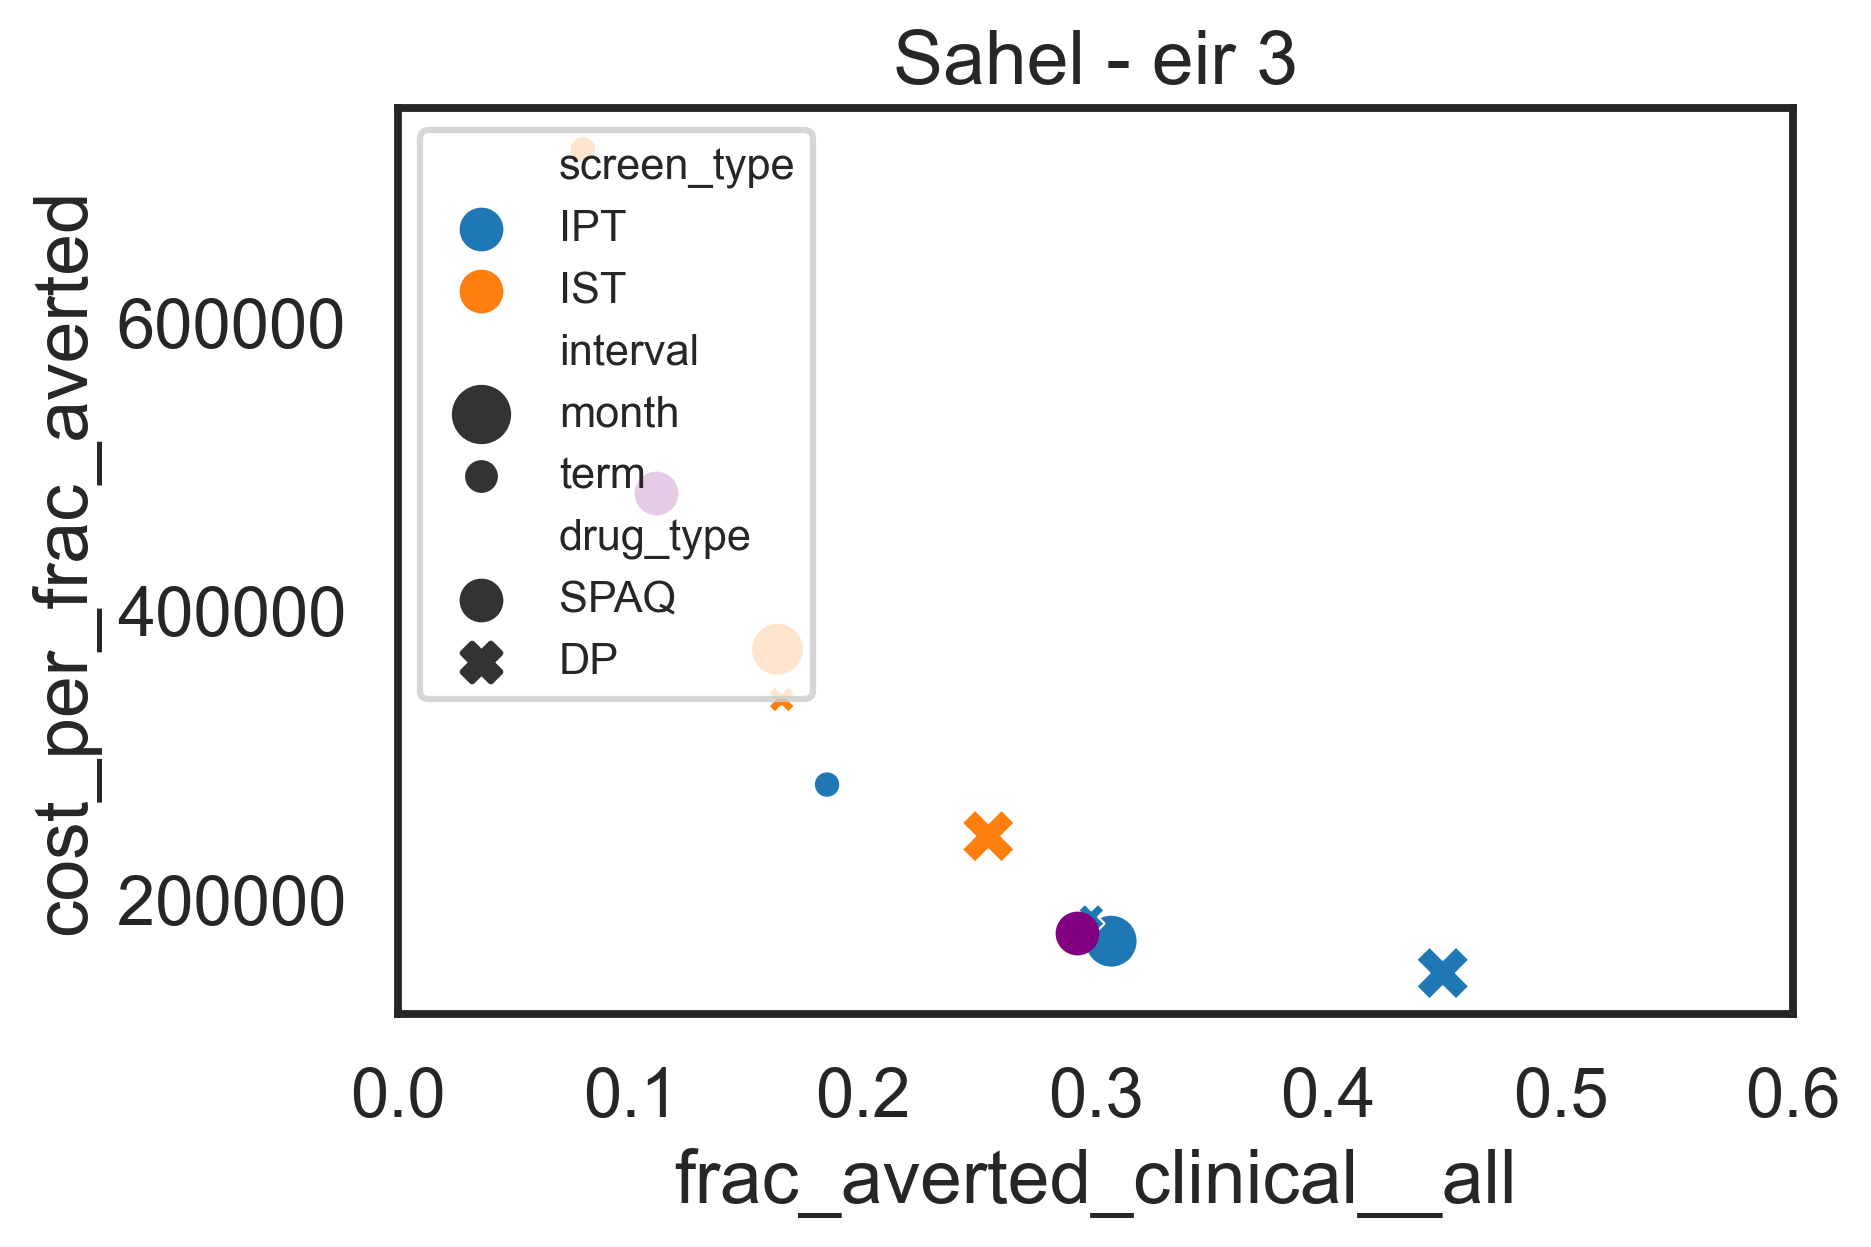

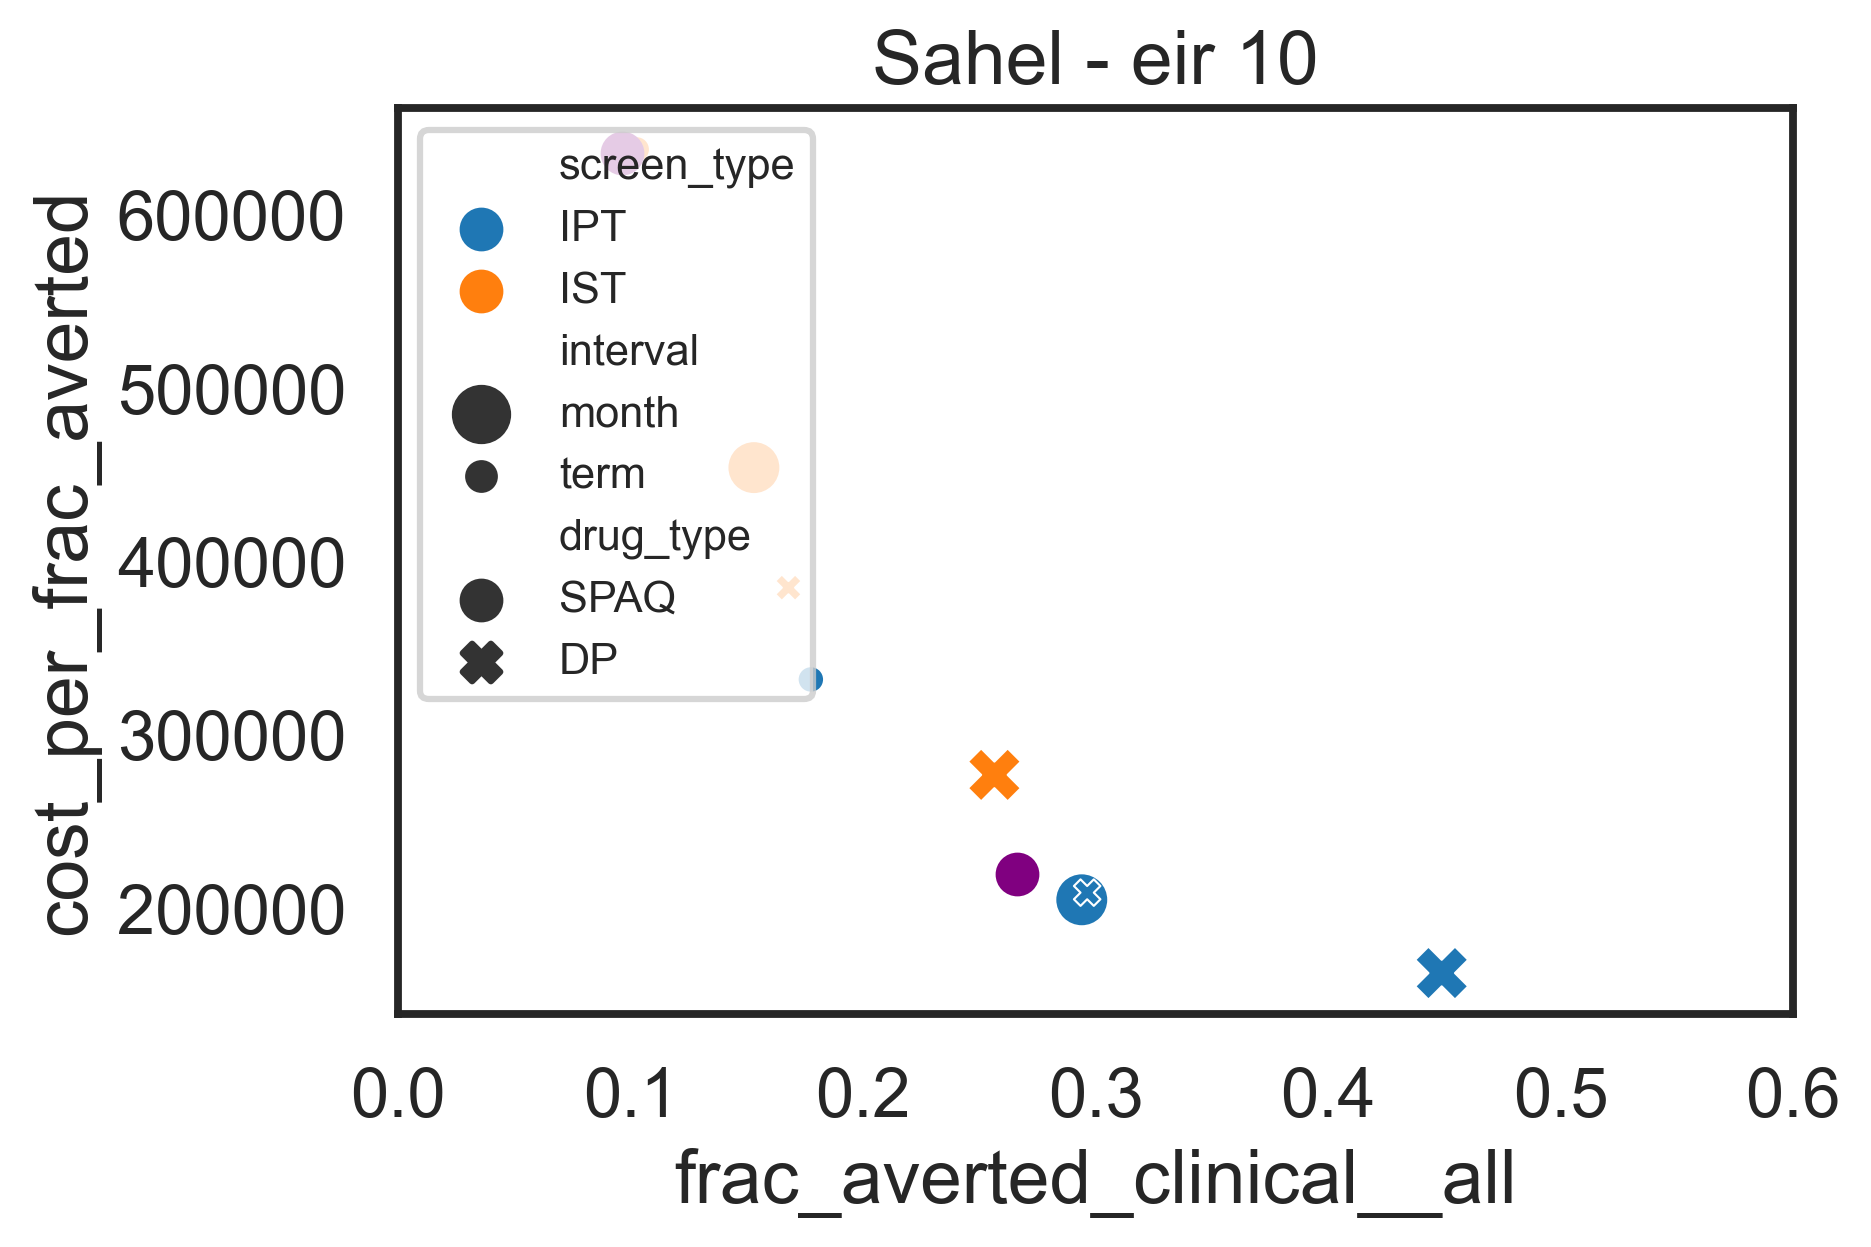

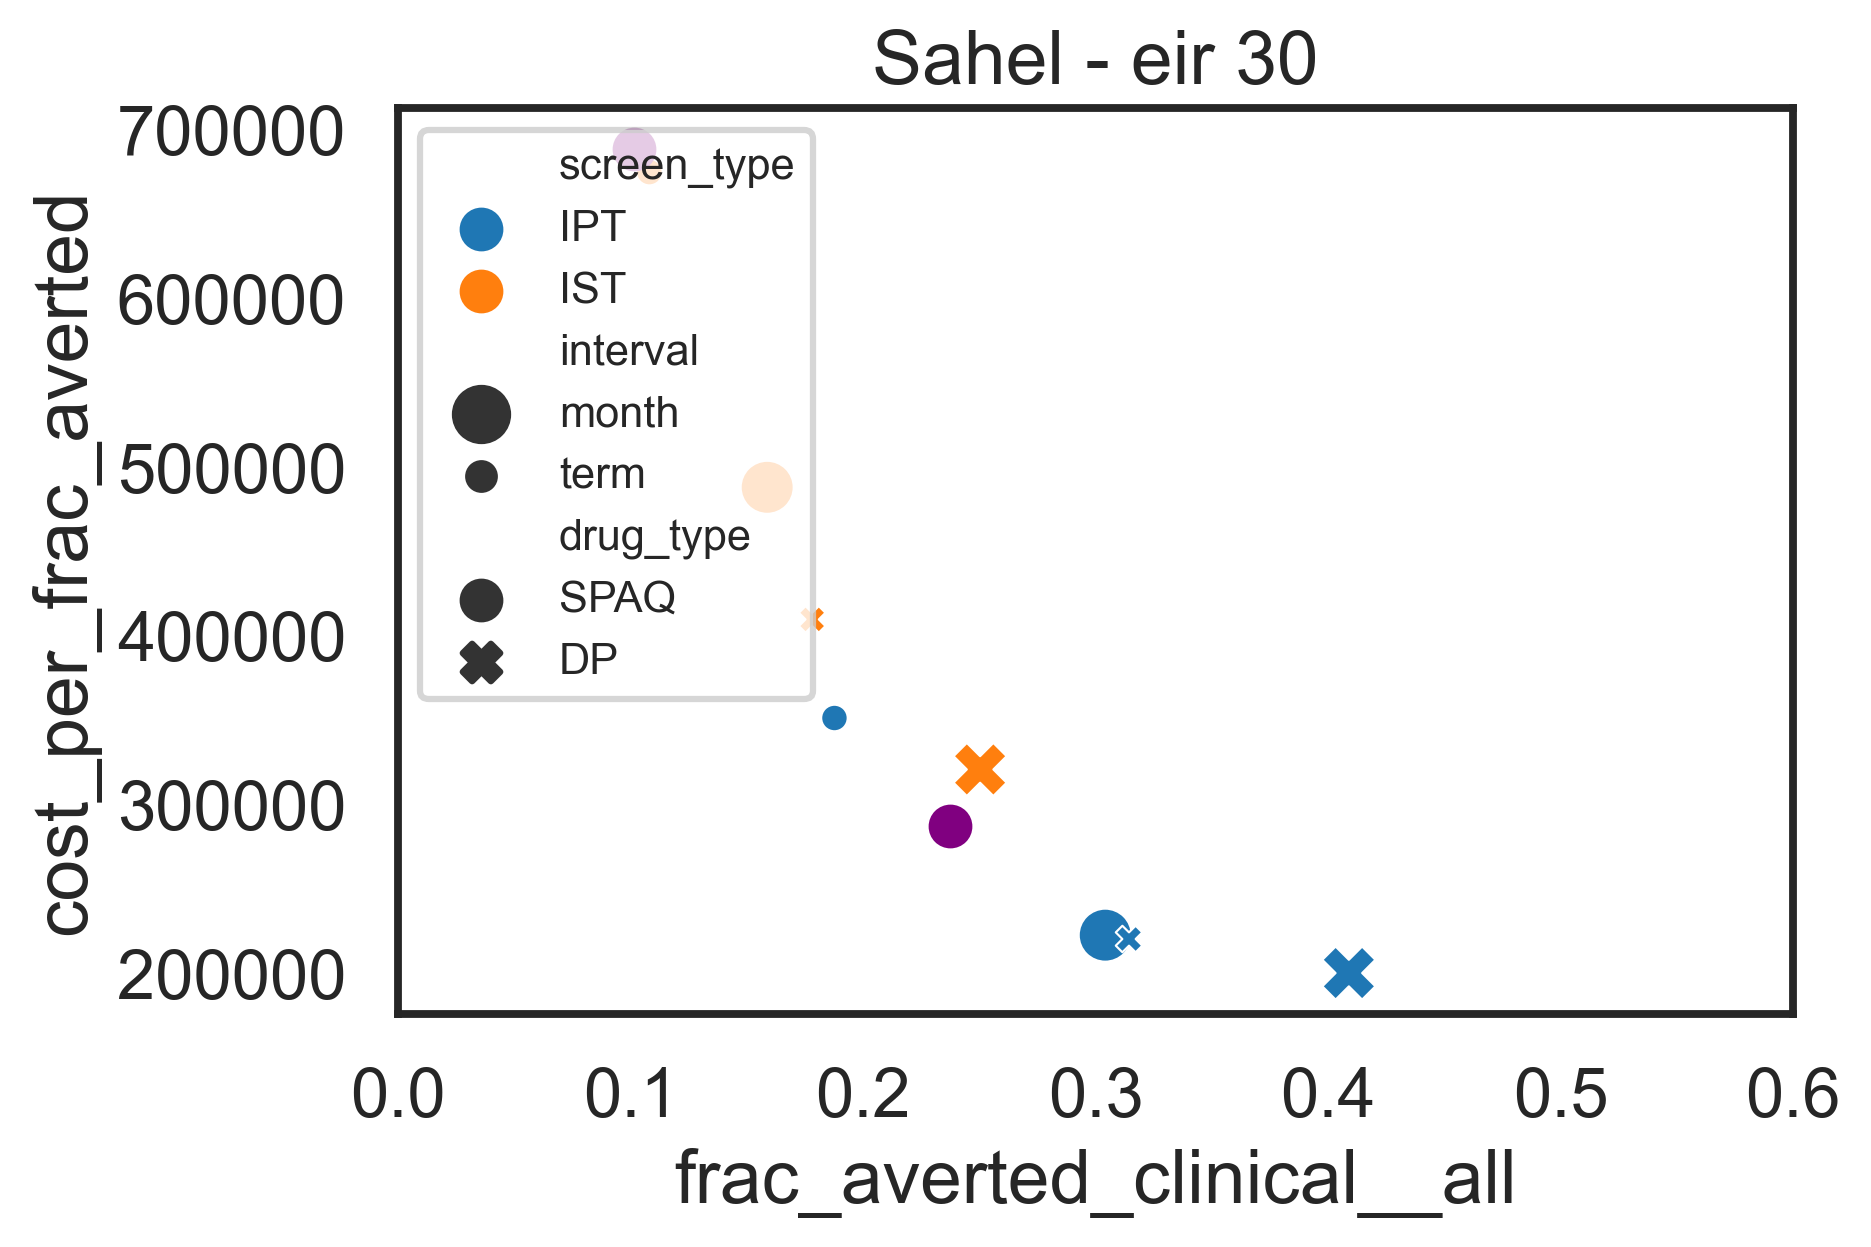

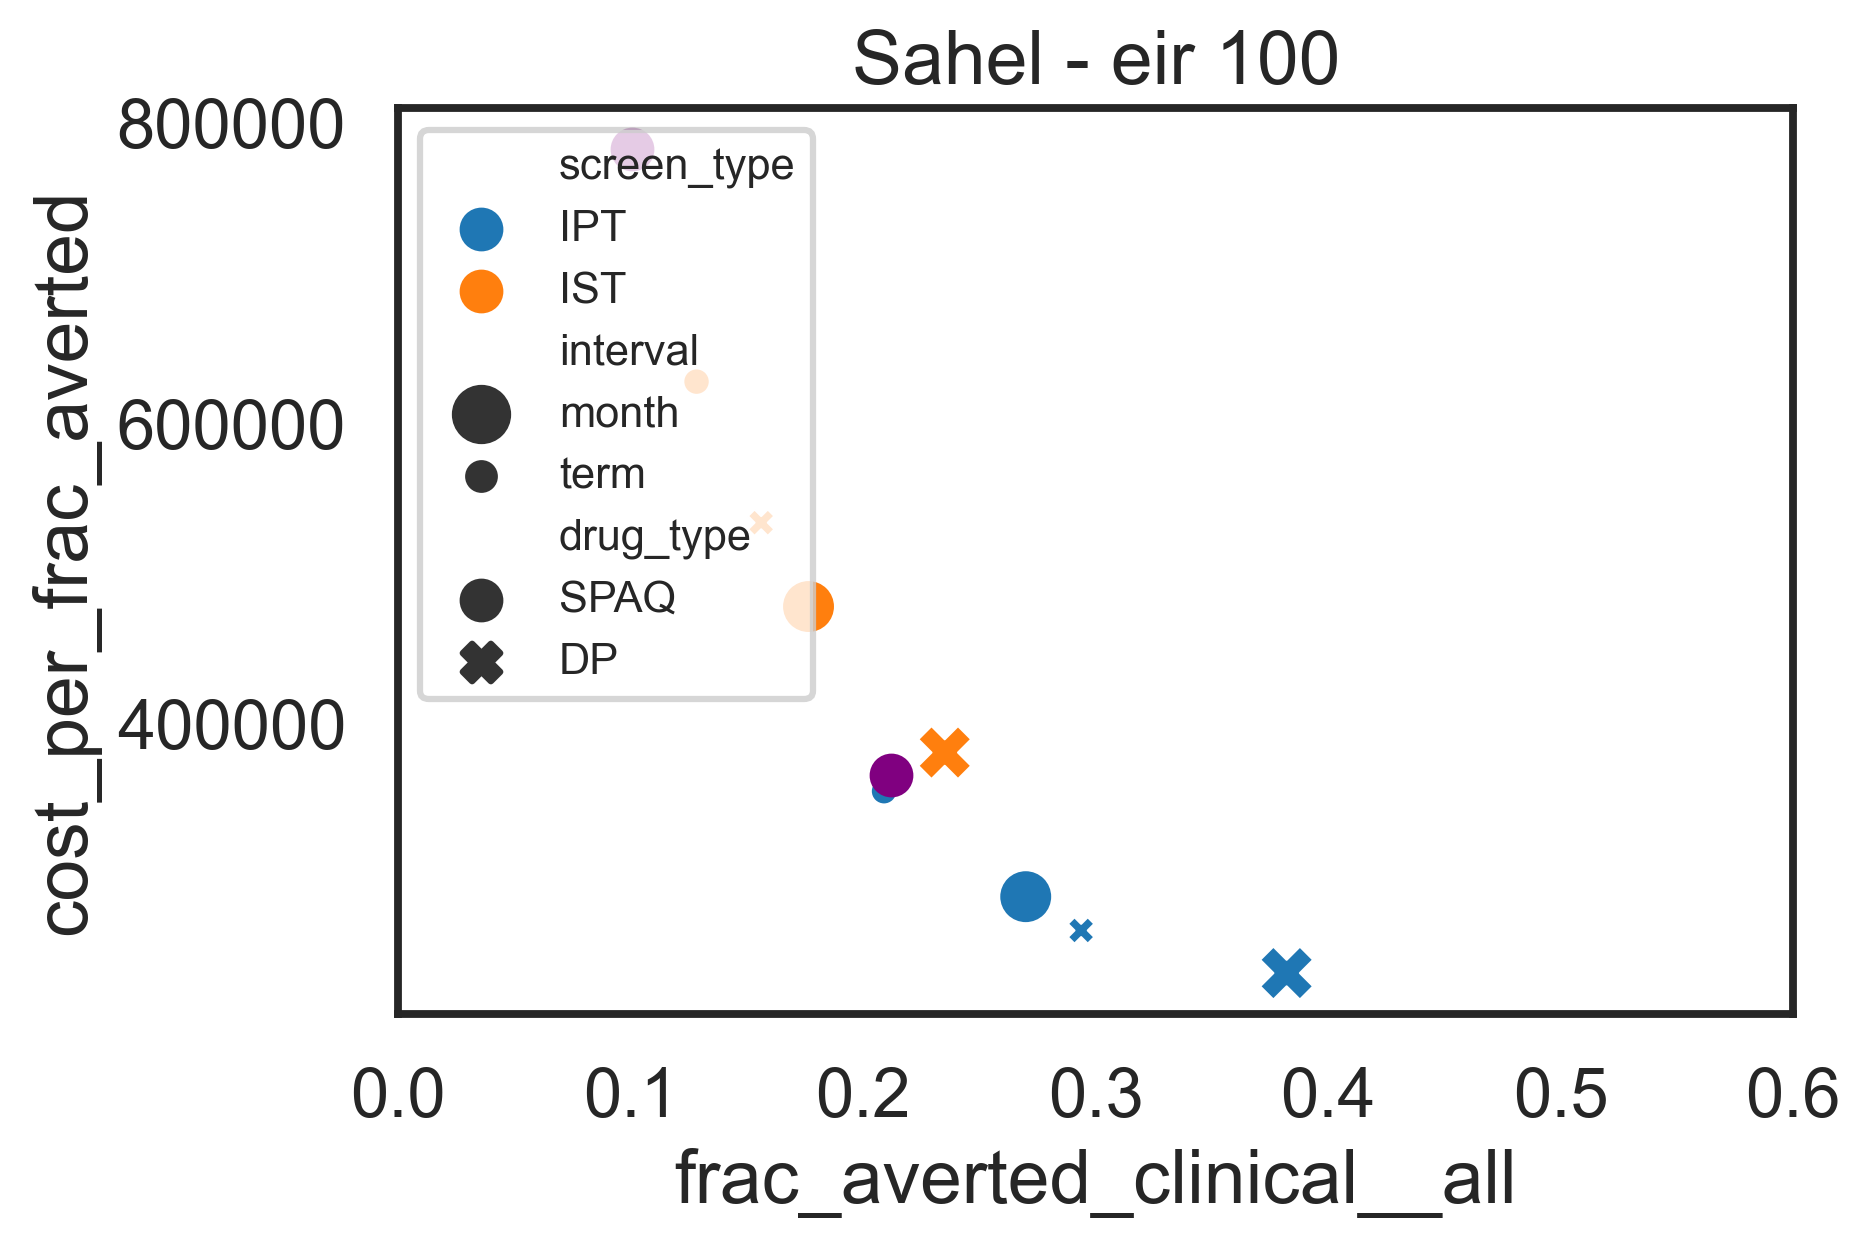

In [11]:
for a, sdf in df_ipt.groupby(["archetype", "baseline_eir"]):
    plt.figure(dpi=300)
    sns.scatterplot(data=sdf, x="frac_averted_clinical__all", y="cost_per_frac_averted", style="drug_type", hue="screen_type", size="interval", size_order=["month","term"])
    plt.title(f"{a[0]} - eir {a[1]}") 
    plt.legend(fontsize="xx-small", loc=2)
    
    # add smc points:
    sdf_smc = df_smc[df_smc["baseline_eir"]==a[1]]
    plt.scatter(sdf_smc["frac_averted_clinical__all"], sdf_smc["cost_per_frac_averted"], color='purple')
    plt.xlim([0,0.6])